from IPython.display import HTML

HTML('''<script>

code_show=true; 

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();

 }

 code_show = !code_show

} 

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Table of Contents

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_predict
from sklearn.base import clone
from collections import Counter
import math
from sklearn.model_selection import RandomizedSearchCV
import copy
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.dummy import DummyRegressor
from yellowbrick.regressor import ResidualsPlot
import datetime
from sklearn import metrics
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import PredictionError
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
from sklearn.metrics import silhouette_score
import pickle
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,precision_score
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import IsolationForest
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from tabulate import tabulate
from pprint import pprint
from scipy import stats
import matplotlib.colors as mcolors

In [2]:
# Reading the fraudtest & fraud train into two different dataframes
df=pd.read_csv('fraudTest.csv')
df1=pd.read_csv('fraudTrain.csv')
# Cocatenating the two differnt dataframes in to one dataframe
df_combined=pd.concat([df,df1],ignore_index=True)

# Data Dictionery

 0   Unnamed: 0             unique identifier  
 1   trans_date_trans_time  Time of Transaction 
 2   cc_num                 Customer unique number 
 3   merchant               Merchant number
 4   category               Category of Transaction
 5   amt                    Amount of tranasction
 6   first                  First name of customer
 7   last                   Last name of customer
 8   gender                 Gender of customer
 9   street                 Street where tranasction took place 
 10  city                   City where tranasction took place 
 12  zip                    Zipcode  
 13  lat                    latitude of transaction
 14  long                   longitude of transaction
 15  city_pop               City Population where fraud took place 
 16  job                    Job of Person  
 17  dob                    Date of Birth  
 18  trans_num              Transaction Number
 19  unix_time              Unique idenifier of time of transaction 
 20  merch_lat              latitude of merchant where transaction occurred
 21  merch_long             longitude of merchant where transaction occurred
 22  is_fraud               binary outcome 1 for fraud 0 for no fraud 

In [3]:
# Read the first & last 5 lines of the combined dataframe
df_combined.head(-5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852384,1296665,2020-06-21 12:08:42,213193596103206,fraud_Gulgowski LLC,home,72.17,James,Hunt,M,7369 Gabriel Tunnel,...,45.7549,-84.4470,95,Electrical engineer,1994-02-09,108c103b26f686c24c021aaf4210977e,1371816522,44.938461,-83.996234,0
1852385,1296666,2020-06-21 12:09:22,4587657402165341815,"fraud_Hyatt, Russel and Gleichner",health_fitness,7.30,Amber,Lewis,F,6296 John Keys Suite 858,...,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,37a18c6fb0c5c722b6339ffedc82f55a,1371816562,40.556811,-88.092339,0
1852386,1296667,2020-06-21 12:10:56,4822367783500458,"fraud_Hahn, Douglas and Schowalter",travel,19.71,Christopher,Farrell,M,97070 Anderson Land,...,28.0758,-81.5929,33804,Exercise physiologist,1991-01-01,34e72e0a659a6c8f4a20ee65594f3a7d,1371816656,27.465871,-81.511804,0
1852387,1296668,2020-06-21 12:11:23,213141712584544,"fraud_Metz, Russel and Metz",kids_pets,100.85,Margaret,Curtis,F,742 Oneill Shore,...,32.1530,-90.1217,19685,Fine artist,1984-12-24,0d86d8c17638d7eff77db9c6a878b477,1371816683,31.377697,-90.528450,0


In [4]:
# Use groupby function to isolate top customer
transaction_counts= df_combined.groupby('cc_num').size().reset_index(name='transction_count')

transaction_counts.head()

,cc_num,transction_count
0,60416207185,2196
1,60422928733,2200
2,60423098130,738
3,60427851591,743
4,60487002085,735


 ids = df_combined["cc_num"]
 df_combined[ids.isin(ids[ids.duplicated()])].sort_values("cc_num")

In [5]:
# Creating a dataframe called df_fraud which only contains fraudulent transactions( equal to 1)
df_fraud=df_combined[df_combined['is_fraud']==1]

# Data Exploration

In [6]:
# Read the first  line of our new dataframe
df_fraud.head(1)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.60429,1


In [7]:
# Reset the index for the new dataframe
df_fraud.reset_index(drop=True, inplace=True)

In [8]:
# The head function below allows for a first look at the dataset
df_fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1,1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
2,1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
3,1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
4,1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1


In [9]:
# Display concise information about the data types contained within the dataset
# Thw information below provides a summary of the dataset. 
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             9651 non-null   int64  
 1   trans_date_trans_time  9651 non-null   object 
 2   cc_num                 9651 non-null   int64  
 3   merchant               9651 non-null   object 
 4   category               9651 non-null   object 
 5   amt                    9651 non-null   float64
 6   first                  9651 non-null   object 
 7   last                   9651 non-null   object 
 8   gender                 9651 non-null   object 
 9   street                 9651 non-null   object 
 10  city                   9651 non-null   object 
 11  state                  9651 non-null   object 
 12  zip                    9651 non-null   int64  
 13  lat                    9651 non-null   float64
 14  long                   9651 non-null   float64
 15  city

Observation- The dataset has no missing columns, The memory usage of the data is very small at 1,8mb, There is a mixture of int64, float64, & object. Within the dataset we have trans_date_trans_time & unix_time. We will drop one of them as they convey the same information.


In [10]:
# The shape function displays the features & attributes contained within the dataset
df_fraud.shape

(9651, 23)

In [11]:
# The drop function is used to remove feature from the dataset.
df_fraud.drop(['Unnamed: 0' ,'cc_num','merchant','first','last','street','zip',
                                       'lat','long','merch_lat','merch_long','trans_num','unix_time','is_fraud'], axis=1,inplace=True)

In [12]:
# Rename features within the dataset 
new_column_names= {'amt':'amount','dob':'Birthday'}

df_fraud.rename(columns=new_column_names, inplace=True)

In [13]:
# Summary of each numerical attribute
df_fraud.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
amount,9651.0,530.66,391.03,1.06,240.08,390.0,902.36,1376.04
city_pop,9651.0,89998.42,306283.34,23.00,795.00,2693.0,19054.00,2906700.00


In [14]:
# we have used describe function on the categorical data contained within the dataset
df_fraud.describe(include = ['O'])

,trans_date_trans_time,category,gender,city,state,job,Birthday
count,9651,9651,9651,9651,9651,9651,9651
unique,9646,14,2,887,51,494,962
top,2020-06-08 22:41:15,grocery_pos,F,Dallas,NY,Quantity surveyor,1977-03-23
freq,2,2228,4899,39,730,69,31


In [15]:
# Discover missing values in our dataset
missing_values=df_fraud.isnull().sum()
print(missing_values)

trans_date_trans_time    0
category                 0
amount                   0
gender                   0
city                     0
state                    0
city_pop                 0
job                      0
Birthday                 0
dtype: int64


In [16]:
# check duplicate entries
df_fraud[df_fraud.duplicated()].shape[0] 

0

In [17]:
# drop duplicate entries
df_fraud_no_duplicates=df_fraud.drop_duplicates()

In [18]:
# check duplicate entries
df_fraud[df_fraud.duplicated()].shape[0] 

0

In [19]:
# Recheck the datatypes within the dataset
df_fraud.dtypes

trans_date_trans_time     object
category                  object
amount                   float64
gender                    object
city                      object
state                     object
city_pop                   int64
job                       object
Birthday                  object
dtype: object

In [20]:
# Change birthday column datatype to datetime for feature engineering
df_fraud['Birthday'] = pd.to_datetime(df_fraud['Birthday'])

In [21]:
# Assuming 'trans_date_trans_time' is in datetime format
df_fraud['trans_date_trans_time'] = pd.to_datetime(df_fraud['trans_date_trans_time'])
df_fraud['Day'] = df_fraud['trans_date_trans_time'].dt.day
df_fraud['Month'] = df_fraud['trans_date_trans_time'].dt.month

# Create 'Time_hour' column based on the hour of the day
df_fraud['Time_hour'] = df_fraud['trans_date_trans_time'].dt.hour

# Create 'Day_Night' column based on the time of day
df_fraud['Day_Night'] = 'Empty'
df_fraud.loc[(df_fraud['Time_hour'] >= 0) & (df_fraud['Time_hour'] <= 6), 'Day_Night'] = 'Early Morning'
df_fraud.loc[(df_fraud['Time_hour'] > 6) & (df_fraud['Time_hour'] <= 12), 'Day_Night'] = 'Morning'
df_fraud.loc[(df_fraud['Time_hour'] > 12) & (df_fraud['Time_hour'] <= 18), 'Day_Night'] = 'Afternoon'
df_fraud.loc[(df_fraud['Time_hour'] > 18) & (df_fraud['Time_hour'] <= 24), 'Day_Night'] = 'Evening'
df_fraud['tranasction_year']=df_fraud['trans_date_trans_time'].apply(lambda t: t.year)
df_fraud['birth_year']=df_fraud['Birthday'].apply(lambda t: t.year)
current_year=datetime.datetime.now().year
df_fraud['age']= current_year - df_fraud['birth_year']

# Xiao,2022.A Practical Guide To Exploratory Data Analysis..Available at: https://medium.com/mlearning-ai/a-practical-guide-to-exploratory-data-analysis-fabbac2bcad [Accesed] 03-11-2023]

In [22]:
# Use drop function is used to remove features from the dataset which we do not require for the problem we are addressing
df_fraud.drop(['trans_date_trans_time','city','state','city_pop','Birthday','birth_year'], axis=1,inplace=True)

In [23]:
# Check the changes
df_fraud.head(5)

,category,amount,gender,job,Day,Month,Time_hour,Day_Night,tranasction_year,age
0,health_fitness,24.84,F,Cytogeneticist,21,6,22,Evening,2020,55
1,misc_net,780.52,M,Public relations officer,21,6,22,Evening,2020,66
2,entertainment,620.33,M,Public relations officer,21,6,22,Evening,2020,66
3,shopping_net,1077.69,M,Herbalist,21,6,22,Evening,2020,30
4,shopping_pos,842.65,F,Cytogeneticist,21,6,23,Evening,2020,55


In [24]:
# Check the features
df_fraud.columns

Index(['category', 'amount', 'gender', 'job', 'Day', 'Month', 'Time_hour',
       'Day_Night', 'tranasction_year', 'age'],
      dtype='object')

In [25]:
# Check the unique instances of the tranasction feature
unique_values= df_fraud['tranasction_year'].unique()
unique_values

array([2020, 2019], dtype=int64)

In [26]:
# Check the datatypes of the dataframe
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   category          9651 non-null   object 
 1   amount            9651 non-null   float64
 2   gender            9651 non-null   object 
 3   job               9651 non-null   object 
 4   Day               9651 non-null   int32  
 5   Month             9651 non-null   int32  
 6   Time_hour         9651 non-null   int32  
 7   Day_Night         9651 non-null   object 
 8   tranasction_year  9651 non-null   int64  
 9   age               9651 non-null   int64  
dtypes: float64(1), int32(3), int64(2), object(4)
memory usage: 641.0+ KB


In [27]:
# For easeier analysis divide the dataframe in to numerical & categorical columns
df_fraud_cat=df_fraud[['category','gender','job','Day_Night']]
df_fraud_num=df_fraud[['amount','Day','Month','Time_hour','tranasction_year','age']]

# Data Preprocessing

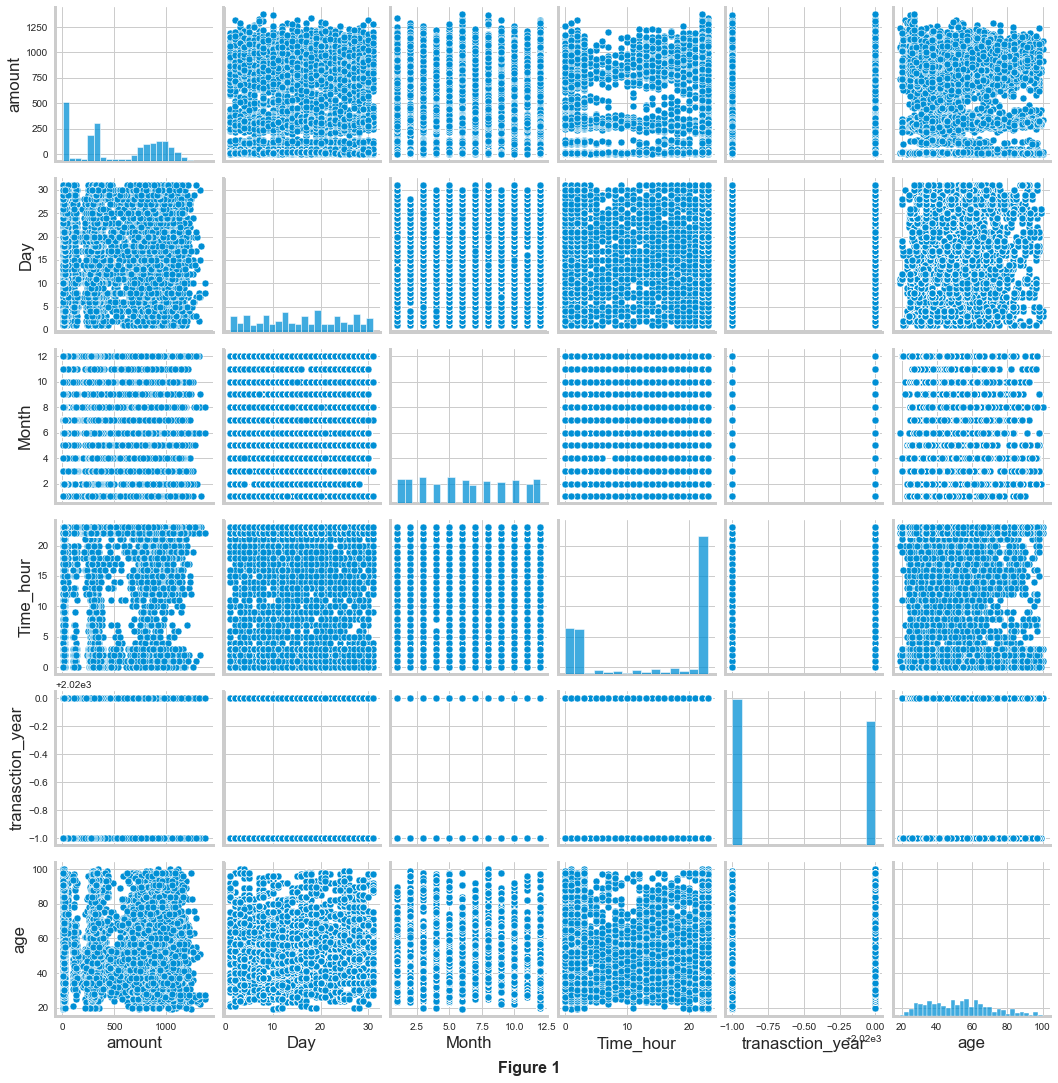

In [28]:
# Setting the style of the pairplot to whitegrid 
sns.set_style('whitegrid')
# Creating a pairplot ftom the dataframe using only numerical columns
sns.pairplot(df_fraud_num)

# Adding a figure label
plt.figtext(0.5,0.001,'Figure 1', ha='center', va='center',fontsize=16, fontweight='bold')

# Display the pairplot
plt.show;


<Axes: >

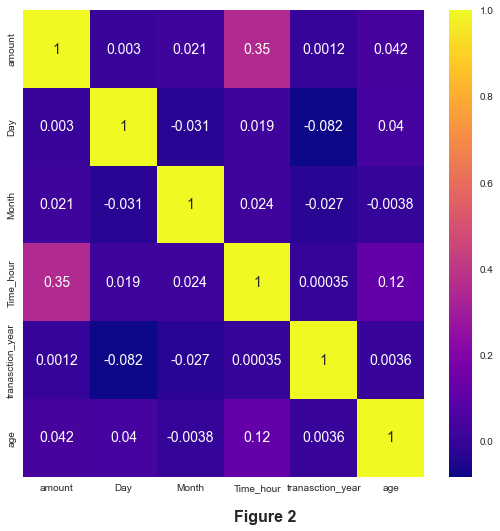

In [29]:
# Setting the style of the correlation matrix to whitegrid 
sns.set_style('whitegrid')
# Setting the size of the correlation matrix  
plt.figure(figsize=(8,8))

# Adding a figure label
plt.figtext(0.5,0.001,'Figure 2', ha='center', va='center',fontsize=16, fontweight='bold')

# Display the correlation matrix 
sns.heatmap(df_fraud_num.corr(),cmap ='plasma',annot=True)


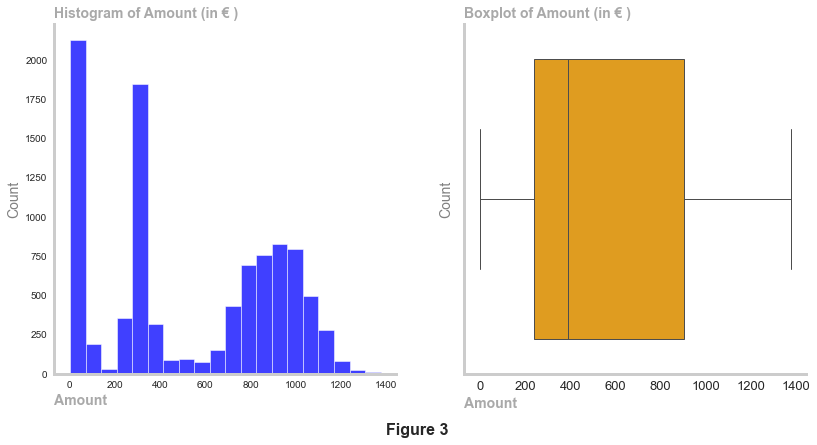

In [30]:
# Setting the style of the histogram to whitegrid 
sns.set_style('whitegrid')

# Creating subplots for the histogrm & boxplots
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Convert "amount" column to a NumPy array
amount_values = df_fraud_num['amount'].values

# Creating a histogram using the amount column
sns.histplot(df_fraud_num, x="amount", bins=20,  color='blue',kde=False, ax=axs[0])
axs[0].set_title('Histogram of Amount (in € )',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
axs[0].set_xlabel('Amount',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
axs[0].set_ylabel('Count',fontsize=14,color= 'grey')
axs[0].xaxis.grid(False)
axs[0].yaxis.grid(False)

# Creating a boxplot using the amount column
sns.boxplot(df_fraud, x="amount", color='orange', ax=axs[1])
axs[1].set_title('Boxplot of Amount (in € )',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Amount',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adjusting tick sizes for x,y axis, despine figures, remove grid lines from the graphs
sns.despine(ax=axs[0])
sns.despine(ax=axs[1])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(False)

# Adding a figure label
plt.figtext(0.5,-0.061,'Figure 3', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
plt.show()


# Mahesh Tiwari,2023.Complete Exploratory Data Analysis (EDA)of Loan Data and Visualization: Understanding Loan Characteristics and Default Patterns..Available at: https://medium.com/nerd-for-tech/complete-exploratory-data-analysis-eda-of-loan-data-and-visualization-understanding-loan-120651cfefc8 [Accesed] 03-12-2023]

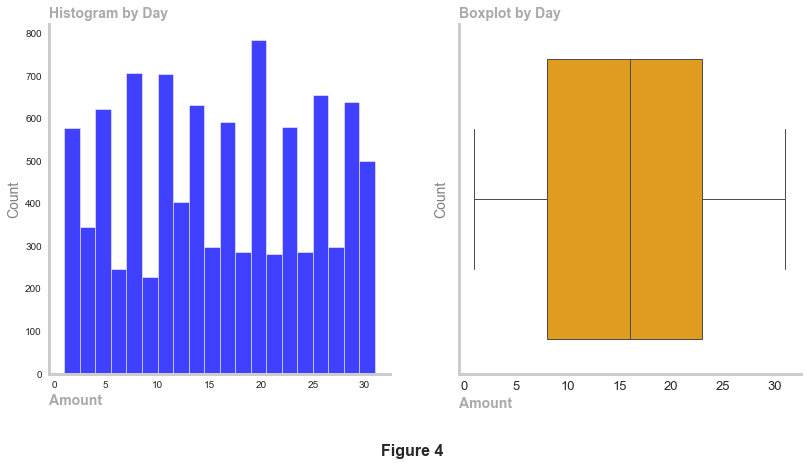

In [31]:
# Setting the style of the histogram to whitegrid 
sns.set_style('whitegrid')

# Creating subplots for the histogrm & boxplot
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Convert "amount" column to a NumPy array
amount_values = df_fraud_num['Day'].values

# Creating a histogram using the amount column
sns.histplot(df_fraud_num, x="Day", bins=20,  color='blue',kde=False, ax=axs[0])
axs[0].set_title('Histogram by Day',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
axs[0].set_xlabel('Amount',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
axs[0].set_ylabel('Count',fontsize=14,color= 'grey')
axs[0].xaxis.grid(False)
axs[0].yaxis.grid(False)

# Creating a boxplot using the amount column
sns.boxplot(df_fraud, x="Day", color='orange', ax=axs[1])
axs[1].set_title('Boxplot by Day',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Amount',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adjusting tick sizes for x,y axis, despine figures, remove grid lines from the graphs
sns.despine(ax=axs[0])
sns.despine(ax=axs[1])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(False)

# Adding a figure label
plt.figtext(0.5,-0.11,'Figure 4', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
plt.show()


# Mahesh Tiwari,2023.Complete Exploratory Data Analysis (EDA)of Loan Data and Visualization: Understanding Loan Characteristics and Default Patterns..Available at: https://medium.com/nerd-for-tech/complete-exploratory-data-analysis-eda-of-loan-data-and-visualization-understanding-loan-120651cfefc8 [Accesed] 03-12-2023]

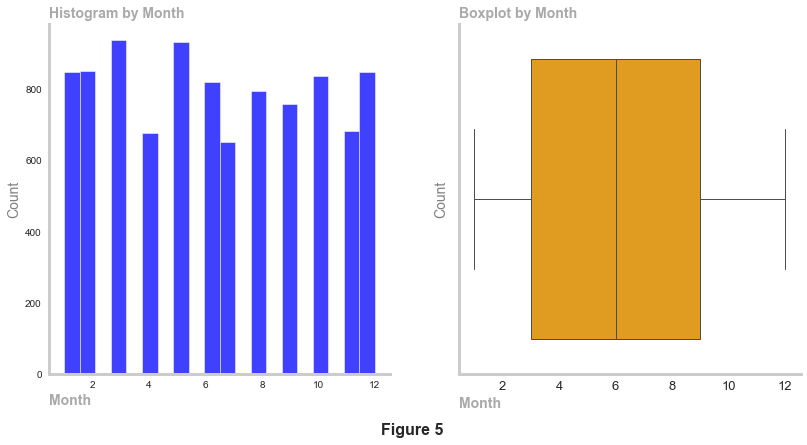

In [32]:
# Setting the style of the histogram to whitegrid 
sns.set_style('whitegrid')

# Creating subplots for the histogrm & boxplot
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Convert "amount" column to a NumPy array
amount_values = df_fraud_num['Month'].values

# Creating a histogram using the amount column
sns.histplot(df_fraud_num, x="Month", bins=20,  color='blue',kde=False, ax=axs[0])
axs[0].set_title('Histogram by Month',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
axs[0].set_xlabel('Month',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
axs[0].set_ylabel('Count',fontsize=14,color= 'grey')
axs[0].xaxis.grid(False)
axs[0].yaxis.grid(False)

# Creating a boxplot using the amount column
sns.boxplot(df_fraud, x="Month", color='orange', ax=axs[1])
axs[1].set_title('Boxplot by Month ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Month',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')


# Adjusting tick sizes for x,y axis, despine figures, remove grid lines from the graphs
sns.despine(ax=axs[0])
sns.despine(ax=axs[1])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(False)

# Adding a figure label
plt.figtext(0.5,-0.061,'Figure 5', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
plt.show()


# Mahesh Tiwari,2023.Complete Exploratory Data Analysis (EDA)of Loan Data and Visualization: Understanding Loan Characteristics and Default Patterns..Available at: https://medium.com/nerd-for-tech/complete-exploratory-data-analysis-eda-of-loan-data-and-visualization-understanding-loan-120651cfefc8 [Accesed] 03-12-2023]

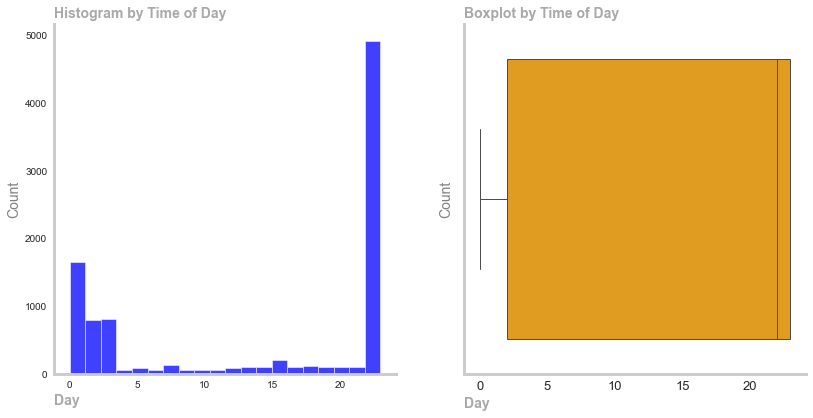

In [33]:
# Setting the style of the histogram to whitegrid
sns.set_style('whitegrid')


# Creating subplots for the histogrm & boxplot
fig, axs = plt.subplots(ncols=2, figsize=(12,6))


# Convert "amount" column to a NumPy array
amount_values = df_fraud_num['Time_hour'].values
sns.histplot(df_fraud_num, x="Time_hour", bins=20,  color='blue',kde=False, ax=axs[0])
axs[0].set_title('Histogram by Time of Day',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
axs[0].set_xlabel('Day',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
axs[0].set_ylabel('Count',fontsize=14,color= 'grey')
axs[0].xaxis.grid(False)
axs[0].yaxis.grid(False)

# Creating a boxplot using the amount column
sns.boxplot(df_fraud, x="Time_hour", color='orange', ax=axs[1])
axs[1].set_title('Boxplot by Time of Day',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Day',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')


# Adjusting tick sizes for x,y axis, despine figures, remove grid lines from the graphs
sns.despine(ax=axs[0])
sns.despine(ax=axs[1])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(False)

# Adding a figure label
# plt.figtext(0.5,-0.061,'Figure 6', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
plt.show()


# Mahesh Tiwari,2023.Complete Exploratory Data Analysis (EDA)of Loan Data and Visualization: Understanding Loan Characteristics and Default Patterns..Available at: https://medium.com/nerd-for-tech/complete-exploratory-data-analysis-eda-of-loan-data-and-visualization-understanding-loan-120651cfefc8 [Accesed] 03-12-2023]

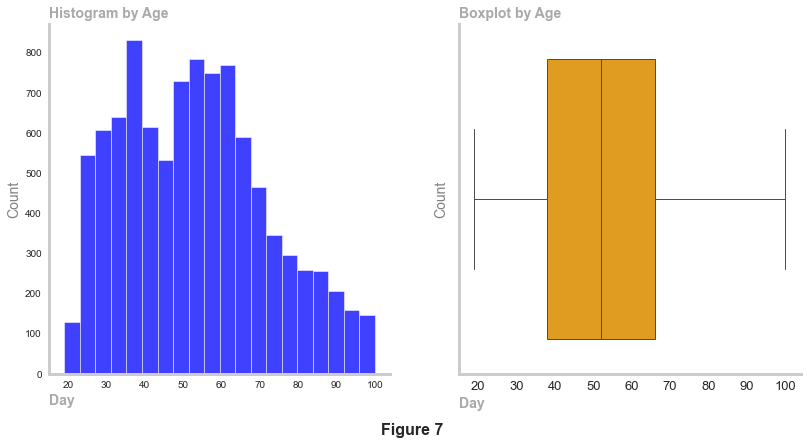

In [34]:
# Setting the style of the histogram to whitegrid
sns.set_style('whitegrid')

# Creating subplots for the histogrm & boxplot
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Convert "amount" column to a NumPy array
amount_values = df_fraud_num['age'].values
sns.histplot(df_fraud_num, x='age', bins=20,  color='blue',kde=False, ax=axs[0])
axs[0].set_title('Histogram by Age',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
axs[0].set_xlabel('Day',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
axs[0].set_ylabel('Count',fontsize=14,color= 'grey')
axs[0].xaxis.grid(False)
axs[0].yaxis.grid(False)

# Creating a boxplot using the amount column
sns.boxplot(df_fraud_num, x='age', color='orange', ax=axs[1])
axs[1].set_title('Boxplot by Age',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Day',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')


# Adjusting tick sizes for x,y axis, despine figures, remove grid lines from the graphs
sns.despine(ax=axs[0])
sns.despine(ax=axs[1])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(False)


# Adding a figure label
plt.figtext(0.5,-0.061,'Figure 7', ha='center', va='center',fontsize=16, fontweight='bold')


# Displaying the plots
plt.show()

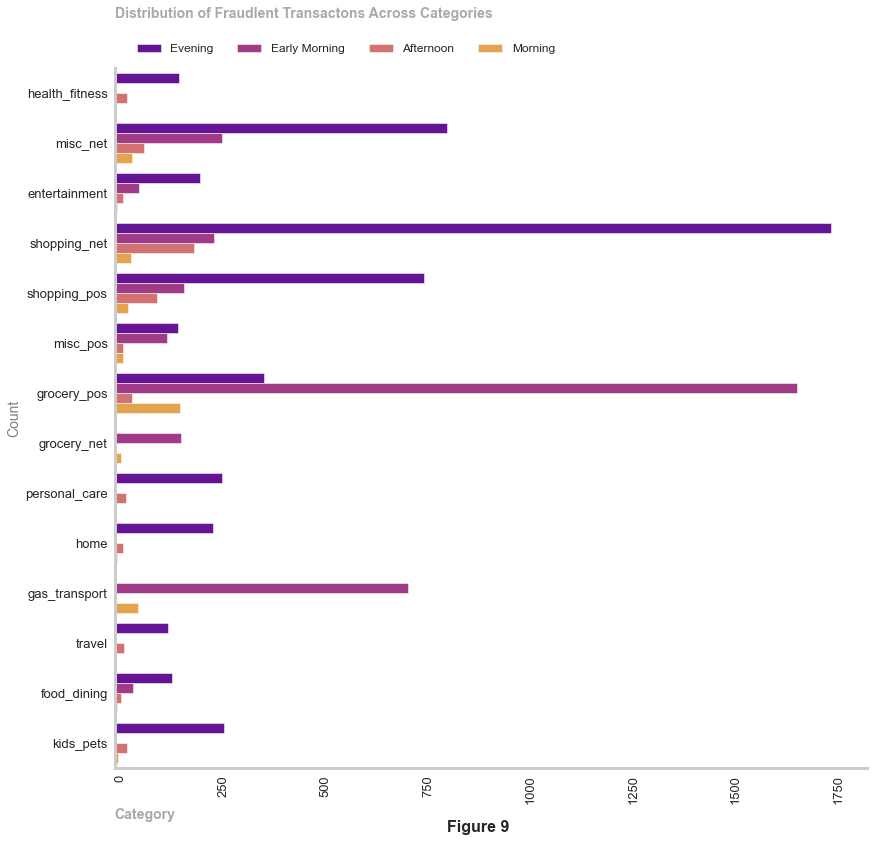

In [35]:
# Setting the size of the figure
plt.figure(figsize=(12,12))

# Setting the style of seaborn for the piechart to whitegrid
sns.set_style('whitegrid')

# Creating a countplot for the distibution of fraudulent transactions across categories
# Differentiaing by the time of the day using te Day_Night column
sns.countplot(y='category',data=df_fraud_cat, hue='Day_Night' , palette='plasma')

# Setting the x_label
plt.xlabel('Category',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the y_label
plt.ylabel('Count',fontsize=14,color= 'grey')

# Setting the title
plt.title('Distribution of Fraudlent Transactons Across Categories',fontsize=14,fontweight='bold',color='darkgrey',loc='left',pad=50)

# Setting the xticks, yticks
plt.xticks(fontsize=13,rotation=90, ha='left')
plt.yticks(fontsize=13)



# Despine te data & remove gridlines from graphs
sns.despine()
plt.grid(False)

# Add a legend
plt.legend(bbox_to_anchor=(0.60,1.05), ncol=4, frameon=False, fontsize=12)

# Adding a figure label
plt.figtext(0.5,0.001,'Figure 9', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
plt.show()

#Mahesh Tiwari,2023.Complete Exploratory Data Analysis (EDA)of Loan Data and Visualization: Understanding Loan Characteristics and Default Patterns..Available at: https://medium.com/nerd-for-tech/complete-exploratory-data-analysis-eda-of-loan-data-and-visualization-understanding-loan-120651cfefc8 [Accesed] 03-12-2023]

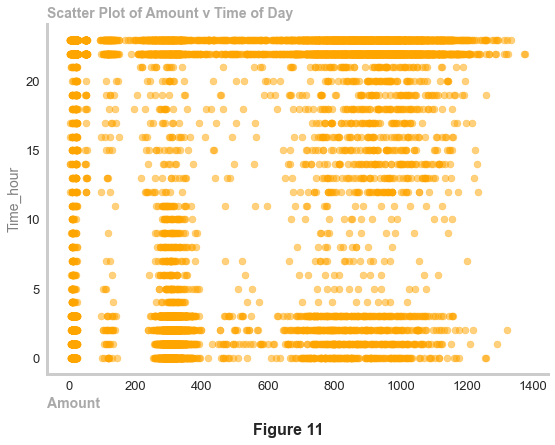

In [36]:
# Extracting the amount and Time_hour columns for the scatter plot
x=df_fraud_num['amount']
y=df_fraud_num['Time_hour']

# Setting the size of the figure
plt.figure(figsize=(8,6))

# Creating a scatter plot of Anount v Time_hour
plt.scatter(x,y, alpha=0.5,color='orange')

# Adding x_axis & ylabel label
plt.xlabel('Amount',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Time_hour',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Scatter Plot of Amount v Time of Day',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Turing off the grid for beetter aesthetics
sns.despine()
plt.grid(False)

# Adding a figure label
plt.figtext(0.5,-0.061,'Figure 11', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
plt.show()

In [37]:
# Calulatr total amount
total_amount = df_fraud['amount'].sum()  # Calculate the total amount

In [38]:
# Create descriptive stats for the Amount Feature
mean_amount=df_fraud['amount'].mean()
median_amount=df_fraud['amount'].median()
std_amount=df_fraud['amount'].std()
skew_amount=df_fraud['amount'].skew()
kurtosis_df=df_fraud['amount'].kurtosis()

# Caluclate total amount
total_amount=df_fraud['amount'].sum().round(2)


percentiles= [0.25,0.50,0.75]
age_percentiles= df_fraud['amount'].quantile(percentiles)

print(f"Total Amount of Fraud is: € {total_amount}")
print(f"Mean Amount is:{mean_amount}")
print(f"Median Amount is:{median_amount}")
print(f"Standard Deviation is:{std_amount}")
print(f"Skew is:{skew_amount}")
print(f"kurtosis is:{kurtosis_df}")
print('Amount Percentiles')
for percentile, amount in zip(percentiles,age_percentiles):
    print(f"{percentiles}th Percentile: {amount}")
    

Total Amount of Fraud is: € 5121413.29
Mean Amount is:530.6614122888819
Median Amount is:390.0
Standard Deviation is:391.0288727210004
Skew is:0.02852441893573336
kurtosis is:-1.5058014561578574
Amount Percentiles
[0.25, 0.5, 0.75]th Percentile: 240.075
[0.25, 0.5, 0.75]th Percentile: 390.0
[0.25, 0.5, 0.75]th Percentile: 902.365


In [39]:
# Creating the range for the amount feature
selected_cols= ['amount']

min_values=df_fraud[selected_cols].min()# Calculate the minimum & maximum values for our columns
max_values=df_fraud[selected_cols].max()

col_ranges= max_values - min_values # Calculate the range for our selected columns

# Create a dataframe to display our results
result_df=pd.DataFrame({'Min Value is' : min_values,'Max value is':max_values, 'Range value is': col_ranges})

print(result_df)

        Min Value is  Max value is  Range value is
amount          1.06       1376.04         1374.98


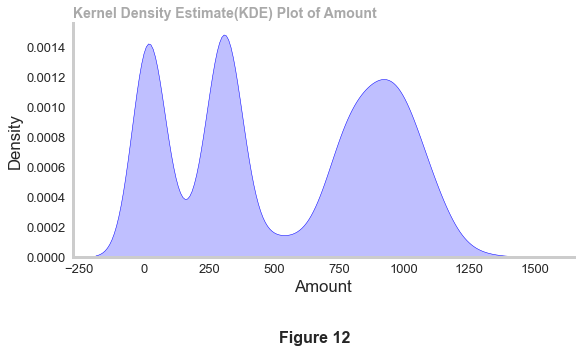

In [40]:
# Kde plot
# Setting the size of the figure
plt.figure(figsize=(8,4))

# Creating a Kde plot
sns.kdeplot(df_fraud['amount'], fill=True, color='blue', label= 'KDE')
plt.title('Kernel Density Estimate(KDE) Plot of Amount',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Amount')
plt.ylabel('Density')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)

# Adding a figure label
plt.figtext(0.5,-.21,'Figure 12', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
plt.show()

#unknown,unknown.Simple 1D Kernel Density Estimation..Available at: https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html [Accesed] 7-11-2023]


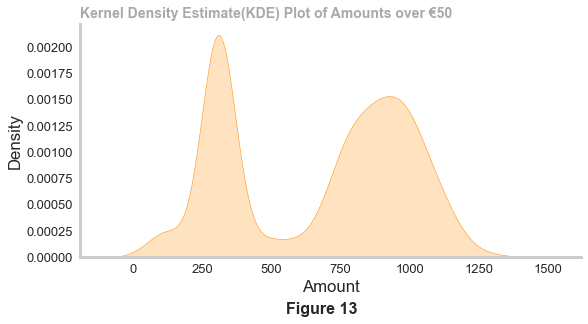

In [41]:
# Kde plot
# Setting the size of the figure
plt.figure(figsize=(8,4))

# We have rmoved amounts of under 50.00
filtered_data=df_fraud[df_fraud['amount'] >=50.00]


# Creating a Kde plot
sns.kdeplot(filtered_data['amount'], fill=True, color='darkorange', label= 'KDE')
plt.title('Kernel Density Estimate(KDE) Plot of Amounts over €50  ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Amount')
plt.ylabel('Density')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)

# Adding a figure label
plt.figtext(0.5,-.111,'Figure 13', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
plt.show()

#unknown,unknown.Simple 1D Kernel Density Estimation..Available at: https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html [Accesed] 7-11-2023]

# Modeling

In [42]:
#  Check Fraud columns
df_fraud.columns

Index(['category', 'amount', 'gender', 'job', 'Day', 'Month', 'Time_hour',
       'Day_Night', 'tranasction_year', 'age'],
      dtype='object')

In [43]:
df_fraud.dtypes

category             object
amount              float64
gender               object
job                  object
Day                   int32
Month                 int32
Time_hour             int32
Day_Night            object
tranasction_year      int64
age                   int64
dtype: object

In [44]:
# Create a label encoder object
le = LabelEncoder()

# Hamza b,2018.Building an Employee Churn Model in Python to Develop a Strategic Retention Plan..Available at: https://medium.com/towards-data-science/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d [Accesed] 14-12-2023]

In [45]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_fraud.columns[1:]:
    if df_fraud[col].dtype == 'object':
        if len(list(df_fraud[col].unique())) <= 2:
            le.fit(df_fraud[col])
            df_fraud[col] = le.transform(df_fraud[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


In [46]:
# convert rest of categorical variable into dummy
df_fraud = pd.get_dummies(df_fraud, drop_first=True)

In [47]:
# Scale fetaurs to a scale between 0 & 1
scaler = MinMaxScaler(feature_range=(0, 5))
fraud_col = list(df_fraud.columns)
fraud_col.remove('amount')
for col in fraud_col:
    df_fraud[col] = df_fraud[col].astype(float)
    df_fraud[[col]] = scaler.fit_transform(df_fraud[[col]])
df_fraud['amount'] = pd.to_numeric(df_fraud['amount'], downcast='float')
df_fraud=df_fraud.round(2)
df_fraud.head()

#  Hamza b,2018.Building an Employee Churn Model in Python to Develop a Strategic Retention Plan..Available at: https://medium.com/towards-data-science/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d [Accesed] 14-12-2023]

,amount,gender,Day,Month,Time_hour,tranasction_year,age,category_food_dining,category_gas_transport,category_grocery_net,...,job_Warehouse manager,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer,Day_Night_Early Morning,Day_Night_Evening,Day_Night_Morning
0,24.840000,0.0,3.33,2.27,4.78,5.0,2.22,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
1,780.520020,5.0,3.33,2.27,4.78,5.0,2.90,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
2,620.330017,5.0,3.33,2.27,4.78,5.0,2.90,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
3,1077.689941,5.0,3.33,2.27,4.78,5.0,0.68,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
4,842.650024,0.0,3.33,2.27,5.00,5.0,2.22,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [48]:
# Spliting the dataset into independent and dependent variables
# Independent variables
X = df_fraud.drop(columns=['amount'])

# Dependent variables
y = df_fraud['amount']


In [49]:
# Split the dataset (X, y) into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Display rows and columns
X_train.shape, X_test.shape

((7720, 515), (1931, 515))

In [50]:
# Create an empty list for te reggresion model
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge(alpha=1.0)))
models.append(('Lasso',Lasso(alpha=1.0)))
models.append(('ElasticNet',ElasticNet(alpha=1.0)))
models.append(('SVR', SVR()))
models.append(('KNr', KNeighborsRegressor()))
models.append(('RFG', RandomForestRegressor()))
models.append(('GBR', GradientBoostingRegressor()))

# Code taken from class notes David McQuaid


In [51]:
# initialalizing empty lists to store te results & names of the models
results = []
names = []

# Looping trough each model in the models list
for name, model in models:
    
    # Setting up k_fold  cross_validation with 10 folds,random state for reproducibility, & shuffle te data
    kfold = KFold(n_splits=2, random_state=1, shuffle=True)
    
    # Performing cross_validation & calculating the negative mean squared error
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    
    # Appending the cross-validation results and model name to the lists
    results.append(cv_results)
    names.append(name)
    
    # Printing the mean & standard deviation of the negative mean squared error for each model
    print('%s: %.2f (+%.2f)' % (name, cv_results.mean(), cv_results.std()))
    
# Code taken from class notes David McQuaid 

LR: -5155078582494585853468213248.00 (+4883488457429417031557447680.00)
Ridge: -10159.37 (+565.91)
Lasso: -9207.54 (+500.30)
ElasticNet: -15823.70 (+219.89)
SVR: -98148.39 (+229.25)
KNr: -34450.82 (+254.79)
RFG: -8832.05 (+164.61)
GBR: -8960.62 (+167.66)


# Results

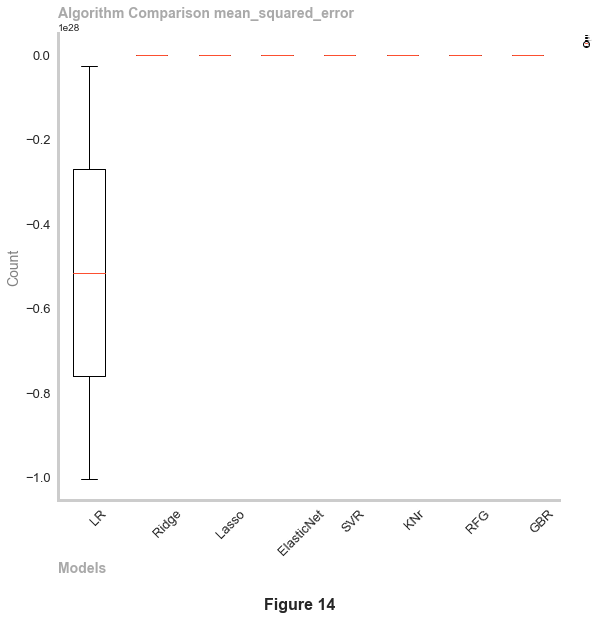

In [52]:
# Creating a size for the plot
plt.figure(figsize=(8,8))

# Creating a style for the plot
sns.set_style('whitegrid')

# Creating a plot to compare the model results
plt.boxplot(results, labels=names)

# Adding a title & legend to the plot
plt.legend(names, loc='lower right',fontsize=20)
plt.title('Algorithm Comparison mean_squared_error',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xlabel('Models',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation=45, ha='left')
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)

# Creating a legend outside the graph
plt.legend(names,loc='upper left',bbox_to_anchor=(1.05,1),fontsize=1)

# Adding a figure label
plt.figtext(0.5,-.111,'Figure 14', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
plt.show()


In [53]:
# Setting up the dummy regressor for the baseline model
model = DummyRegressor().fit(X_train, y_train)
print(model.score(X_train, y_train))
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))


# Printing the mean & standard deviation of the negative mean squared error for each model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


#Tracyrenee,2021.How to use skearn’s DummyRegressor method..Available at: https://medium.com/geekculture/how-to-use-skearns-dummyregressor-method-f08098212c54 [Accesed] 06-12-2023]

0.0
-0.00025685041530154606
Mean Absolute Error: 364.4048
Mean Squared Error: 153992.22
Root Mean Squared Error: 392.41843


In [54]:
# Compare the actual & predicted values from the dummy regressor
compare = pd.DataFrame({'actual': y_test.values.ravel(), 'predicted': y_pred})
compare

#Tracyrenee,2021.How to use skearn’s DummyRegressor method..Available at: https://medium.com/geekculture/how-to-use-skearns-dummyregressor-method-f08098212c54 [Accesed] 06-12-2023]

,actual,predicted
0,17.709999,529.403259
1,869.739990,529.403259
2,756.900024,529.403259
3,247.470001,529.403259
4,1032.410034,529.403259
...,...,...
1926,954.719971,529.403259
1927,262.820007,529.403259
1928,904.869995,529.403259
1929,908.979980,529.403259


Mean Absolute Error: 364.4048
Mean Squared Error: 153992.22
Root Mean Squared Error: 392.41843


<Figure size 576x576 with 0 Axes>

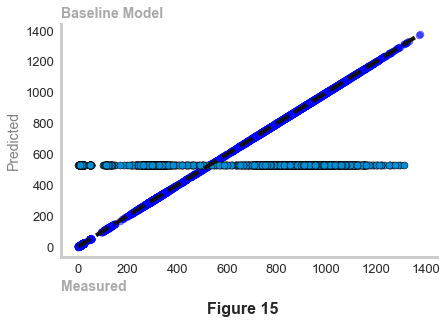

In [55]:
# Setting the size of the figure
plt.figure(figsize=(8,8))
fig, ax = plt.subplots()

# Creating a scatter plot of actual to predicted for baseline model
plt.scatter(x,y, alpha=0.5,color='blue')
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

# Adding x_axis & ylabel label
ax.set_xlabel('Measured',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
ax.set_ylabel('Predicted',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Baseline Model',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)

# Printing the mean & standard deviation of the negative mean squared error for each model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

         
# Adding a figure label
plt.figtext(0.5,-.111,'Figure 15', ha='center', va='center',fontsize=16, fontweight='bold')
         
# Displaying the plots
plt.show();

#Tracyrenee,2021.How to use skearn’s DummyRegressor method..Available at: https://medium.com/geekculture/how-to-use-skearns-dummyregressor-method-f08098212c54 [Accesed] 06-12-2023]

In [56]:
# Running the model a randomforest regressor an ensemble technique that builds on decision tree
model=RandomForestRegressor(random_state=1)
model.fit(X_train,y_train)


# R2 score for training set
r2_train=model.score(X_train,y_train)
print(f'R2 Score is(Training): {r2_train}')


# R2 score for testing set
y_pred_test=model.predict(X_test)
r2_test=model.score(X_test,y_test)
print(f'R2 Score is(Testing): {r2_test}')

# Caluclate mean absolute percentage error
def calculate_mape(y_true,y_pred):
    mape=np.mean(np.abs((y_true - y_pred) / y_true)) *100
    return mape
y_pred = model.predict(X_test)


# Printing the mean & standard deviation of the negative mean squared error for each model
print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Random Forest Error:', calculate_mape(y_test, y_pred))

R2 Score is(Training): 0.9907562045154962
R2 Score is(Testing): 0.9547807012801113
Mean Absolute Error Random Forest: 50.471527708937465
Mean Squared Error Random Forest: 6961.632907414961
Root Mean Squared Error Random Forest: 83.43640037426687
Mean Absolute Percentage Random Forest Error: 40.29336490544287


In [57]:
# Running the model a Gradient boosting regressor
gb_model=GradientBoostingRegressor(random_state=1)
gb_model.fit(X_train,y_train)


# R2 score for training set
r2_train_gb=gb_model.score(X_train,y_train)
print(f'R2 Score is(Training)- Gradient Boosting: {r2_train_gb}')


# R2 score for testing set
y_pred_test_gb=gb_model.predict(X_test)
r2_test_gb= gb_model.score(X_test,y_test)
print(f'R2 Score is(Testing)- Gradient_Boosting: {r2_test_gb}')

# Calculate mean absolute percentage error
mape_gb = calculate_mape(y_test, y_pred_test_gb)
print(f'Mean Absolute Percentage Error (Gradient Boosting): {mape_gb}')

# Printing the mean & standard deviation of the negative mean squared error for each model
print('Mean Absolute Error(Gradient Boosting):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(Gradient Boosting):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(Gradient Boosting):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f'Mean Absolute Percentage Error(Gradient Boosting): {calculate_mape(y_test,y_pred)}')

R2 Score is(Training)- Gradient Boosting: 0.9458000141458537
R2 Score is(Testing)- Gradient_Boosting: 0.9475248451492727
Mean Absolute Percentage Error (Gradient Boosting): 84.63872573538367
Mean Absolute Error(Gradient Boosting): 50.471527708937465
Mean Squared Error(Gradient Boosting): 6961.632907414961
Root Mean Squared Error(Gradient Boosting): 83.43640037426687
Mean Absolute Percentage Error(Gradient Boosting): 40.29336490544287


# Evaluate Results

In [58]:
# Look at parameters used by our current forest
print(' Random Forest Parameters currently in use:\n')
pprint(model.get_params())


# Will Koehrsen,2018.Hyperparameter Tuning the Random Forest in Python..Available at: https://medium.com/towards-data-science/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 [Accesed] 06-12-2023]

 Random Forest Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [59]:
# Look at parameters used by our current forest
print('Gradient Boosting Parameters currently in use:\n')
pprint(gb_model.get_params())


# Will Koehrsen,2018.Hyperparameter Tuning the Random Forest in Python..Available at: https://medium.com/towards-data-science/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 [Accesed] 06-12-2023]

Gradient Boosting Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


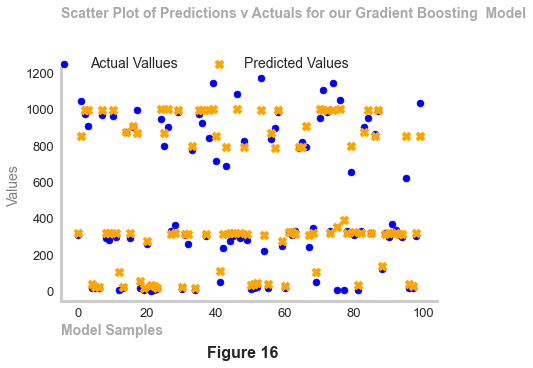

In [60]:
# Extracting a subset of the data for visualizations
some_data = X_train.head(100).values
some_labels = y_train.head(100).to_numpy() 

# Making precdictions using the model
predictions = gb_model.predict(some_data)

# Scatter plot of actual values v predicted values
plt.scatter(range(len(some_labels)), some_labels,color='blue', label='Actual Vallues', marker='o')
plt.scatter(range(len(predictions)), predictions,color='orange', label='Predicted Values', marker='x')

# Adding x_axis & ylabel label
plt.xlabel('Model Samples',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Values',fontsize=14,color= 'grey')

# Creating a title for the plot
plt.title('Scatter Plot of Predictions v Actuals for our Gradient Boosting  Model',fontsize=14,fontweight='bold',color='darkgrey',loc='left',pad=50)

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


# Add a legend
plt.legend(bbox_to_anchor=(0.80,1.10), ncol=2, frameon=False, fontsize=14)

# Turning off the grid for better aesthetics
sns.despine()
plt.grid(False)

# Adding a figure label
plt.figtext(0.5,-.111,'Figure 16', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
plt.show()          


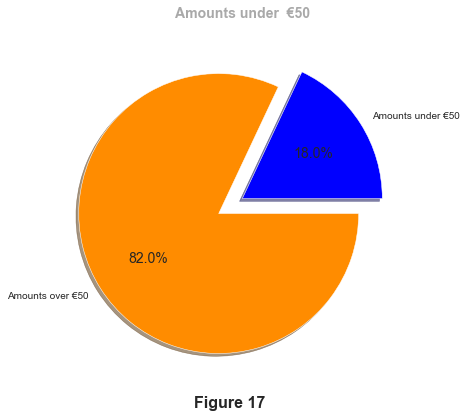

In [61]:
# Making predictions on the model some data
predictions=gb_model.predict(some_data)

# Setting the threshold of €50
threshold=50.00


#  Defining categoties for the pie chart
categories = ['Amounts under €50','Amounts over €50']

#  Counting predctions below 7 above the set threshold
below_threshold_count= sum(predictions < threshold)
above_threshold_count= sum(predictions >= threshold)

#  Creating sizes for the pie chart
sizes = [below_threshold_count, above_threshold_count]

#  Creating a pie chart to visualize the results
fig, ax= plt.subplots(figsize=(12,6))
plt.pie(sizes, labels=categories,explode=[0,0.2], autopct = "%1.1f%%", shadow = True, colors=['blue', 'darkorange'])

#  Setting a title for the pie chart
plt.title("Amounts under  €50",fontsize=14,fontweight='bold',color='darkgrey')

#  Setting y labels & y ticks
plt.ylabel("")
plt.yticks(fontsize=13)


# Adding a figure label
plt.figtext(0.5,0.001,'Figure 17', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
plt.show;


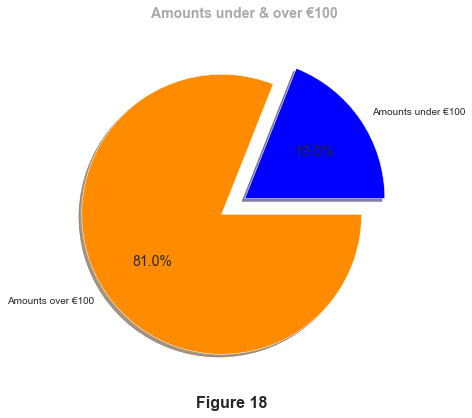

In [62]:
# Making predictions on the model some data
predictions100=gb_model.predict(some_data)

# Setting the threshold of €100
threshold=100.00


#  Defining categoties for the pie chart
categories = ['Amounts under €100','Amounts over €100']

#  Counting predctions below 7 above the set threshold
below_threshold_count= sum(predictions100 < threshold)
above_threshold_count= sum(predictions100 >= threshold)

#  Creating sizes for the pie chart
sizes = [below_threshold_count, above_threshold_count]

#  Creating a pie chart to visualize the results
fig, ax= plt.subplots(figsize=(12,6))
plt.pie(sizes, labels=categories,explode=[0,0.2], autopct = "%1.1f%%", shadow = True, colors=['blue', 'darkorange'])

#  Setting a title for the pie chart
plt.title("Amounts under & over €100",fontsize=14,fontweight='bold',color='darkgrey')

#  Setting y labels & y ticks
plt.ylabel("")
plt.yticks(fontsize=13)


# Adding a figure label
plt.figtext(0.5,0.001,'Figure 18', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
plt.show;


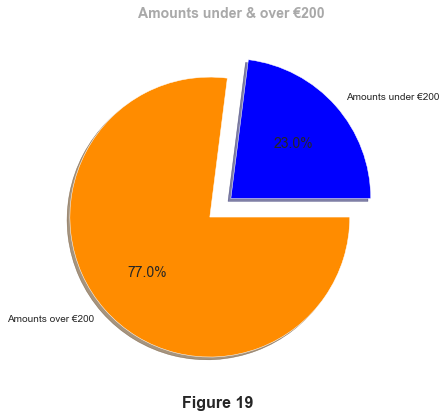

In [63]:
# Making predictions on the model some data
predictions=gb_model.predict(some_data)

# Setting the threshold of €200
threshold=200.00


#  Defining categoties for the pie chart
categories = ['Amounts under €200','Amounts over €200']

#  Counting predctions below 7 above the set threshold
below_threshold_count= sum(predictions < threshold)
above_threshold_count= sum(predictions >= threshold)

#  Creating sizes for the pie chart
sizes = [below_threshold_count, above_threshold_count]

#  Creating a pie chart to visualize the results
fig, ax= plt.subplots(figsize=(12,6))
plt.pie(sizes, labels=categories,explode=[0,0.2], autopct = "%1.1f%%", shadow = True, colors=['blue', 'darkorange'])

#  Setting a title for the pie chart
plt.title("Amounts under & over €200",fontsize=14,fontweight='bold',color='darkgrey')

#  Setting y labels & y ticks
plt.ylabel("")
plt.yticks(fontsize=13)


# Adding a figure label
plt.figtext(0.5,0.001,'Figure 19', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
plt.show;


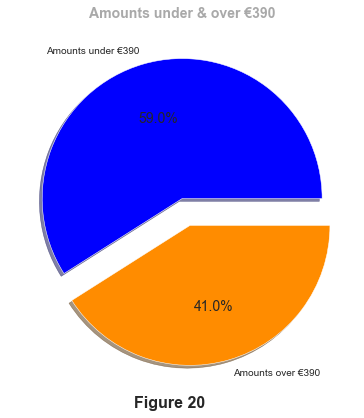

In [64]:
# Making predictions on the model some data
predictions=gb_model.predict(some_data)

# Setting the threshold of €390.00
threshold=390.00


#  Defining categoties for the pie chart
categories = ['Amounts under €390','Amounts over €390']

#  Counting predctions below 7 above the set threshold
below_threshold_count= sum(predictions < threshold)
above_threshold_count= sum(predictions >= threshold)

#  Creating sizes for the pie chart
sizes = [below_threshold_count, above_threshold_count]

#  Creating a pie chart to visualize the results
fig, ax= plt.subplots(figsize=(12,6))
plt.pie(sizes, labels=categories,explode=[0,0.2], autopct = "%1.1f%%", shadow = True, colors=['blue', 'darkorange'])

#  Setting a title for the pie chart
plt.title("Amounts under & over €390",fontsize=14,fontweight='bold',color='darkgrey')

#  Setting y labels & y ticks
plt.ylabel("")
plt.yticks(fontsize=13)


# Adding a figure label
plt.figtext(0.5,0.001,'Figure 20', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
plt.show;


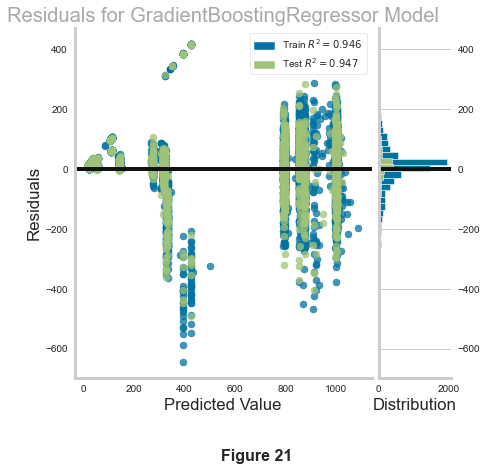

In [65]:
# Setting the size of the figure
plt.figure(figsize=(6,6))


# Creating a residuals plot for the random forest regressor
visualizer = ResidualsPlot(GradientBoostingRegressor())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

# Creating a title for the plot
plt.title("Residuals for RandomForestRegressor Model",fontsize=14,fontweight='bold',color='darkgrey', pad=50)

# Add a legend
plt.legend(bbox_to_anchor=(0.60,1.05), ncol=2, frameon=False, fontsize=12)



# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)

# Adding a figure label
plt.figtext(0.5,-.111,'Figure 21', ha='center', va='center',fontsize=16, fontweight='bold')


# Displaying the plots
visualizer.show();

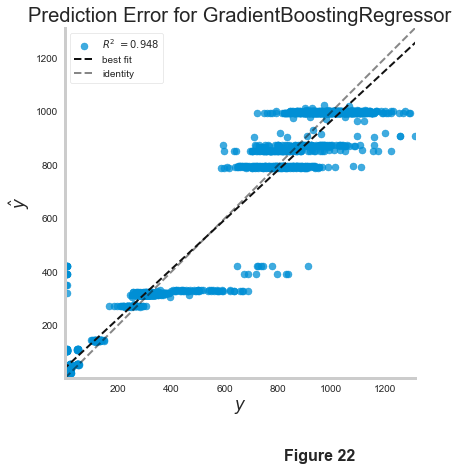

<Axes: title={'center': 'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [66]:
# Setting the size of the figure
plt.figure(figsize=(6,6))

# Creating a Ridge plot for the random forest regressor
visualizer = PredictionError(gb_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

# Add a legend
plt.legend(bbox_to_anchor=(0.60,1.05), ncol=2, frameon=False, fontsize=12)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)

# Adding a figure label
plt.figtext(0.7,-0.111,'Figure 22', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
visualizer.show()

In [67]:
cv_scores_gb = cross_val_score(gb_model, X,y, cv =5, scoring='r2', error_score='raise')

print(f'Cross- validated R2 Scores  for Gradient Boosting: {cv_scores_gb}')

#from sklearn.model_selection import GridSearchCV

# Set parameters for gridsearch
param_grid_gb = {
    'n_estimators' : [50,100,200],
    'learning_rate' : [0.01,0.1,0.2],
    'max_depth' : [3,5,7]
}

grid_search_gb=GridSearchCV(GradientBoostingRegressor(random_state=1), param_grid_gb, cv=5)
grid_search_gb.fit(X_train,y_train)
best_params_gb = grid_search_gb.best_params_
print(f'Best hyperparameters for Gradient Boosting: {best_params_gb}')

# update model using best hyperparameters
best_gb_model= GradientBoostingRegressor(random_state=1, **best_params_gb)
best_gb_model.fit(X_train,y_train)
y_pred_best_gb = best_gb_model.predict(X_test)
r2_best_gb = best_gb_model.score(X_test,y_test)
print(f'R2 Score with best hyperparameters(testing) for Gradient Boosting: {r2_best_gb}')

# Create the final model with the best hyperparameters
gb_model= GradientBoostingRegressor(learning_rate=0.2, max_depth=7, n_estimators=50, random_state=1)

# Fit the final model

gb_model.fit(X,y)

# R2 score for training set
r2_train_gb=gb_model.score(X_train,y_train)
print(f'R2 Score is(Training)- Gradient Boosting: {r2_train_gb}')


# R2 score for testing set
y_pred_test_gb=gb_model.predict(X_test)
r2_test_gb= gb_model.score(X_test,y_test)
print(f'R2 Score is(Testing)- Gradient_Boosting: {r2_test_gb}')

# Calculate mean absolute percentage error
mape_gb = calculate_mape(y_test, y_pred_test_gb)
print(f'Mean Absolute Percentage Error (Gradient Boosting): {mape_gb}')

# Printing the mean & standard deviation of the negative mean squared error for each model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f'Mean Absolute Percentage Error(Gradient Boosting): {calculate_mape(y_test,y_pred)}')


Cross- validated R2 Scores  for Gradient Boosting: [0.946023   0.94310189 0.94528584 0.94321266 0.93796445]
Best hyperparameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
R2 Score with best hyperparameters(testing) for Gradient Boosting: 0.9534643477083097
R2 Score is(Training)- Gradient Boosting: 0.963771324522839
R2 Score is(Testing)- Gradient_Boosting: 0.9656277158394928
Mean Absolute Percentage Error (Gradient Boosting): 43.59551794702684
Mean Absolute Error: 50.471527708937465
Mean Squared Error: 6961.632907414961
Root Mean Squared Error: 83.43640037426687
Mean Absolute Percentage Error(Gradient Boosting): 40.29336490544287


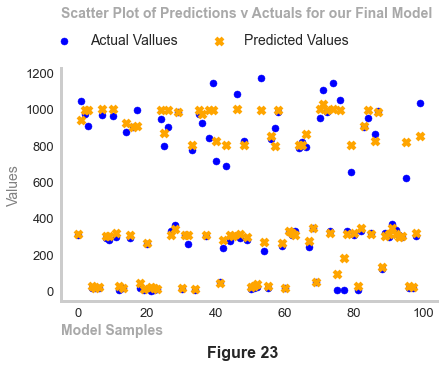

In [68]:
# Extracting a subset of the data for visualizations
some_data = X_train.head(100).values
some_labels = y_train.head(100).to_numpy() 

# Making precdictions using the model
predictions = gb_model.predict(some_data)

# Scatter plot of actual values v predicted values
plt.scatter(range(len(some_labels)), some_labels,color='blue', label='Actual Vallues', marker='o')
plt.scatter(range(len(predictions)), predictions,color='orange', label='Predicted Values', marker='x')

# Adding x_axis & ylabel label
plt.xlabel('Model Samples',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Values',fontsize=14,color= 'grey')

# Creating a title for the plot
plt.title('Scatter Plot of Predictions v Actuals for our Final Model',fontsize=14,fontweight='bold',color='darkgrey',loc='left', pad=50)

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Add a legend
plt.legend(bbox_to_anchor=(0.80,1.20), ncol=2, frameon=False, fontsize=14)

# Turning off the grid for better aesthetics
sns.despine()
plt.grid(False)

# Adding a figure label
plt.figtext(0.5,-.111,'Figure 23', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
plt.show() 

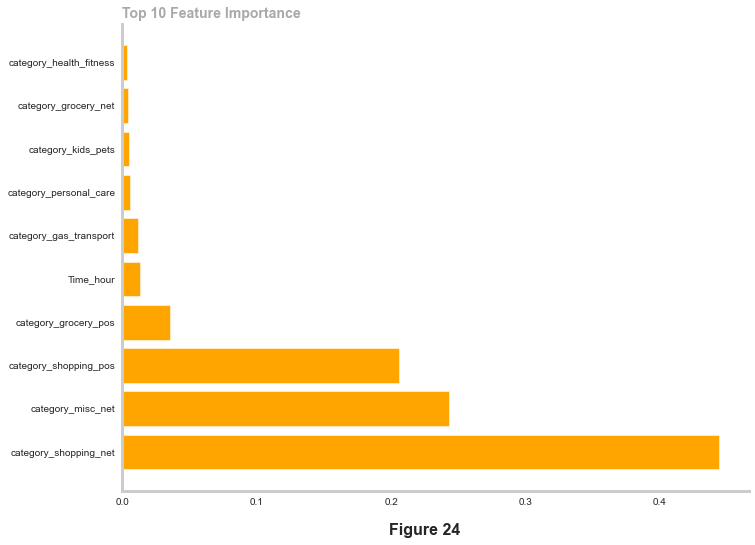

In [69]:
# Sort feature importances in descending order
importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1] 

# Rearrange feature names so they match the sorted feature importances
top_features=10

selected_indices= indices[:top_features]
selected_importances= importances[selected_indices]
selected_names=[X_train.columns[i] for i in selected_indices
               ]
# Create plot
plt.figure(figsize=(10, 8)) 

# Create plot title
plt.title(f"Top {top_features} Feature Importance",fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Add bars
plt.barh(range(top_features), selected_importances, color='orange')

# Add feature names as x-axis labels
plt.yticks(range(top_features), selected_names) 

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)


# Adding a figure label
plt.figtext(0.5,0.001,'Figure 24', ha='center', va='center',fontsize=16, fontweight='bold')

 # Show plot
plt.show() 


 # Hamza b,2018.Building an Employee Churn Model in Python to Develop a Strategic Retention Plan..Available at: https://medium.com/towards-data-science/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d [Accesed] 14-12-2023]

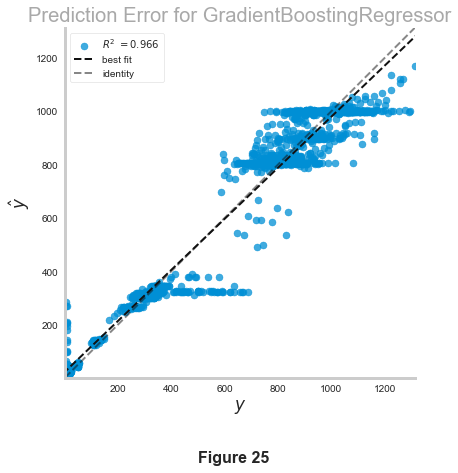

<Axes: title={'center': 'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [70]:
# Setting the size of the figure
plt.figure(figsize=(6,6))

# Creating a Ridge plot for the random forest regressor
visualizer = PredictionError(gb_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

# Add a legend
plt.legend(bbox_to_anchor=(0.60,1.05), ncol=2, frameon=False, fontsize=12)

# Creating a title for the plot
plt.title("Prediction Error for Final GradientBoosting Model",fontsize=14,fontweight='bold',color='darkgrey',pad=50)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)

# Adding a figure label
plt.figtext(0.5,-0.117,'Figure 25', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
visualizer.show()

<function matplotlib.pyplot.show(close=None, block=None)>

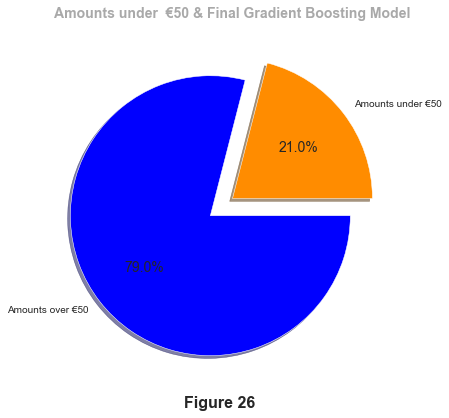

In [71]:
# Making predictions on the model some data
predictions50=gb_model.predict(some_data)

# Setting the threshold of €50
threshold=50.00


#  Defining categoties for the pie chart
categories = ['Amounts under €50','Amounts over €50']

#  Counting predctions below 7 above the set threshold
below_threshold_count= sum(predictions50 < threshold)
above_threshold_count= sum(predictions50 >= threshold)

#  Creating sizes for the pie chart
sizes = [below_threshold_count, above_threshold_count]

#  Creating a pie chart to visualize the results
fig, ax= plt.subplots(figsize=(12,6))
plt.pie(sizes, labels=categories,explode=[0,0.2], autopct = "%1.1f%%", shadow = True, colors=['darkorange', 'blue'])

#  Setting a title for the pie chart
plt.title("Amounts under  €50 & Final Gradient Boosting Model",fontsize=14,fontweight='bold',color='darkgrey')

#  Setting y labels & y ticks
plt.ylabel("")
plt.yticks(fontsize=20)


# Adding a figure label
plt.figtext(0.5,0.001,'Figure 26', ha='center', va='center',fontsize=16, fontweight='bold')

# Displaying the plots
plt.show

In [72]:
from scipy.stats import pearsonr

#  Calculate the correlation coefficient
correlation, p_value = pearsonr(some_labels,predictions)
print(f'Correlation Coefficient: {correlation}')
print(f'P-value: {p_value}')

Correlation Coefficient: 0.9881632056942805
P-value: 1.327108331165798e-81


The correlation coefficient and the corresponding p-value offer statistical confirmation of a highly robust postive linear association between the predictions ot the final model and the actual values. This serves as an affirmation of the precision and dependability of the model

# Individual Customer Model

# Data Wrangling

In [73]:
# Check Combined columns
df_combined.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [74]:
# select columns  for new dataframe
selected_columns = ['trans_date_trans_time', 'cc_num', 'category','city','state','zip','lat','long',
         'merch_lat', 'merch_long', 'is_fraud']


new_df= df_combined[selected_columns].copy()

new_df.head()

,trans_date_trans_time,cc_num,category,city,state,zip,lat,long,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,personal_care,Columbia,SC,29209,33.9659,-80.9355,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,personal_care,Altonah,UT,84002,40.3207,-110.4360,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,health_fitness,Bellmore,NY,11710,40.6729,-73.5365,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,misc_pos,Titusville,FL,32780,28.5697,-80.8191,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,travel,Falmouth,MI,49632,44.2529,-85.0170,44.959148,-85.884734,0


In [75]:
# Change trans date time to datetime
new_df['trans_date_trans_time']=pd.to_datetime(new_df['trans_date_trans_time'])

In [76]:
# Use groupby function to isolate top customer
transaction_counts= df.groupby('cc_num').size().reset_index(name='transction_count')

transaction_counts.head()

,cc_num,transction_count
0,60416207185,678
1,60422928733,669
2,60423098130,228
3,60427851591,215
4,60487002085,239


In [77]:
# Define the customer to filter
customer_number_to_filter= 60416207185

# Filter the original dataframe to include transactional data associated with the specified customer
customer_transactions= new_df[new_df['cc_num'] == customer_number_to_filter]

# Select relevant columnd
relevant_columns= ['trans_date_trans_time', 'cc_num', 'category', 'lat',
       'long', 'merch_lat', 'merch_long', 'is_fraud']

# Create a new dataframe with only the the relvant columns
transactions_new_df= customer_transactions[relevant_columns].reset_index(drop=True)
# Head of the new data
transactions_new_df

,trans_date_trans_time,cc_num,category,lat,long,merch_lat,merch_long,is_fraud
0,2020-06-21 13:05:42,60416207185,home,43.0048,-108.8964,42.945526,-108.530901,0
1,2020-06-21 16:25:36,60416207185,misc_pos,43.0048,-108.8964,42.193130,-108.682054,0
2,2020-06-22 07:58:33,60416207185,gas_transport,43.0048,-108.8964,43.932724,-109.699794,0
3,2020-06-22 15:32:31,60416207185,kids_pets,43.0048,-108.8964,43.546064,-109.212939,0
4,2020-06-23 12:28:54,60416207185,personal_care,43.0048,-108.8964,42.876538,-109.333220,0
...,...,...,...,...,...,...,...,...
2191,2020-06-20 08:14:58,60416207185,gas_transport,43.0048,-108.8964,42.835943,-109.676659,0
2192,2020-06-20 15:14:35,60416207185,shopping_pos,43.0048,-108.8964,42.947259,-108.857871,0
2193,2020-06-20 20:18:04,60416207185,shopping_net,43.0048,-108.8964,43.070351,-108.720024,0
2194,2020-06-20 22:19:35,60416207185,shopping_net,43.0048,-108.8964,42.446059,-109.612926,0


In [78]:
# Rename the new dataframe
df_fraud=transactions_new_df

In [79]:
# check shape of new dataframe
df_fraud.shape

(2196, 8)

In [80]:
# Assuming 'trans_date_trans_time' is in datetime format
df_fraud['trans_date_trans_time'] = pd.to_datetime(df_fraud['trans_date_trans_time'])
df_fraud['Day'] = df_fraud['trans_date_trans_time'].dt.day
df_fraud['Month'] = df_fraud['trans_date_trans_time'].dt.month

# Create 'Time_hour' column based on the hour of the day
df_fraud['Time_hour'] = df_fraud['trans_date_trans_time'].dt.hour

# Create 'Day_Night' column based on the time of day
df_fraud['Day_Night'] = 'Empty'
df_fraud.loc[(df_fraud['Time_hour'] >= 0) & (df_fraud['Time_hour'] <= 6), 'Day_Night'] = 'Early Morning'
df_fraud.loc[(df_fraud['Time_hour'] > 6) & (df_fraud['Time_hour'] <= 12), 'Day_Night'] = 'Morning'
df_fraud.loc[(df_fraud['Time_hour'] > 12) & (df_fraud['Time_hour'] <= 18), 'Day_Night'] = 'Afternoon'
df_fraud.loc[(df_fraud['Time_hour'] > 18) & (df_fraud['Time_hour'] <= 24), 'Day_Night'] = 'Evening'
#df_fraud['tranasction_year']=df_fraud['trans_date_trans_time'].apply(lambda t: t.year)


# Xiao,2022.A Practical Guide To Exploratory Data Analysis..Available at: https://medium.com/mlearning-ai/a-practical-guide-to-exploratory-data-analysis-fabbac2bcad [Accesed] 03-11-2023]

In [81]:
# Save a copy for later 
df_day_night=df_fraud

# Spatial Analyis

In [82]:
# The drop function is used to remove feature from the dataset.
df_fraud.drop(['cc_num'], axis=1,inplace=True)

In [83]:
# Create new dataframe
df_spatial=df_fraud[['merch_lat','merch_long','is_fraud']]

In [84]:
# Create a dataframe using merch_la & Merch_long
scaled=df_spatial[['merch_lat','merch_long',]]

In [85]:
# Within Cluster Sum of Squares
wcss = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

[895.2072429579548, 567.4843287400432, 361.69829740424774, 304.08597443969734, 256.44084441179575]


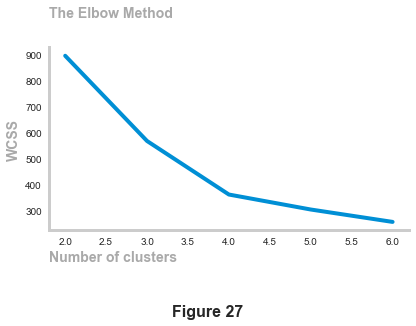

In [86]:
# Initialize an empty list to store the within cluster sum of squares (WCSS)
wcss = []

# Loop through different numbers of clusters
for i in range(2, 7):
    # Initialize Kmeans clustering algorithm with current number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                random_state = 42)
    # Fit KMeans to the scaled data
    kmeans.fit(scaled)
    
    # Append the wcss to the list
    wcss.append(kmeans.inertia_)
    
# plot the elbow method graph
plt.plot(range(2, 7), wcss)

# Customize plot title & labels
plt.title('The Elbow Method',fontsize=14,fontweight='bold',color='darkgrey',loc='left',pad=30)
plt.xlabel('Number of clusters',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('WCSS',fontsize=14,fontweight='bold',color='darkgrey')

# turn off the grid & despine the plot
plt.grid(False)
sns.despine()

# Adjust the layout
plt.tight_layout()


# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 27', ha='center', va='center',fontsize=16, fontweight='bold')

# Display the plot
plt.show()

In [87]:
# Use silhouette score to get better cluster using kmeans ++ to mitigate local minima
for i in range (2,7):
    kmeans=KMeans(n_clusters=i,max_iter=40, n_init=10, init='k-means++').fit(scaled)
    cluster_labels=kmeans.labels_
    silhouette_avg=silhouette_score(df_spatial,cluster_labels)
    print('for N_Clusters ={}, the silhouette score using the kmeans ++ is {:.2f}' .format(i,silhouette_avg))

for N_Clusters =2, the silhouette score using the kmeans ++ is 0.36
for N_Clusters =3, the silhouette score using the kmeans ++ is 0.38
for N_Clusters =4, the silhouette score using the kmeans ++ is 0.41
for N_Clusters =5, the silhouette score using the kmeans ++ is 0.39
for N_Clusters =6, the silhouette score using the kmeans ++ is 0.36


In [88]:
 # fit kmeans algorithm
kmeans = KMeans(n_clusters=4, n_init=10,init='k-means++', random_state=42).fit(scaled)
clusters=kmeans.labels_

# add clusters to customer details
df_spatial['Cluster']=clusters

# Visualize customer details
df_spatial.head()

,merch_lat,merch_long,is_fraud,Cluster
0,42.945526,-108.530901,0,3
1,42.193130,-108.682054,0,3
2,43.932724,-109.699794,0,1
3,43.546064,-109.212939,0,1
4,42.876538,-109.333220,0,0


In [89]:
# Filter rowa where is fraud =1
fraudulent_transactions= df_spatial[df_spatial['is_fraud']==1]

# Display filtered dataframe
fraudulent_transactions.head(9)

,merch_lat,merch_long,is_fraud,Cluster
793,43.432352,-108.982476,1,1
794,42.656763,-109.868240,1,0
795,42.084862,-109.537321,1,0
796,42.739276,-107.975363,1,3
797,42.204230,-109.341230,1,0
798,42.468523,-109.687147,1,0
799,42.869714,-108.879962,1,0
800,42.132393,-109.694820,1,0
801,42.995377,-109.128294,1,0


In [90]:
# Calculate the silhouette score
silhouette_avg= silhouette_score(scaled, kmeans.labels_)

print('The original kmeans silhouette  score is:', silhouette_avg)

The original kmeans silhouette  score is: 0.4084265967100556


In [91]:
# Calculate calinski harabrass score
calinski_harabasz_score_value= calinski_harabasz_score(scaled,kmeans.labels_)
print("Scalinski_harabasz_score  For Original KMeans afrer  clustering is:", calinski_harabasz_score_value)

Scalinski_harabasz_score  For Original KMeans afrer  clustering is: 2194.347547317294


In [92]:
# Calculate davies buldin score
davies_bouldin_score_value=davies_bouldin_score(scaled,kmeans.labels_)
print("Davies_bouldin_score  For Original KMeans  clustering is:", davies_bouldin_score_value)

Davies_bouldin_score  For Original KMeans  clustering is: 0.773211361806818


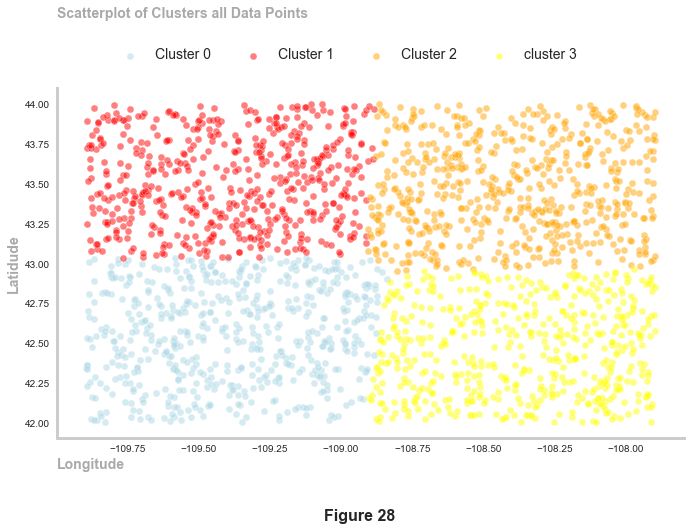

In [93]:
# Set style of plot
sns.set_style('whitegrid')

# plot scatter plot
plt.figure(figsize=(10,6))

# plot Cluster 0
sns.scatterplot(x='merch_long', y='merch_lat', data=df_spatial[df_spatial['Cluster']==0], color='lightblue', label='Cluster 0', alpha=0.5)
                                                                               
# plot  cluster 1
sns.scatterplot(x='merch_long', y='merch_lat', data=df_spatial[df_spatial['Cluster']==1], color='red', label='Cluster 1', alpha=0.5)                                                                              

# plot cluster 2
sns.scatterplot(x='merch_long', y='merch_lat', data=df_spatial[df_spatial['Cluster']==2], color='orange', label='Cluster 2', alpha=0.5)
                                                                               
# plot  cluster 3
sns.scatterplot(x='merch_long', y='merch_lat', data=df_spatial[df_spatial['Cluster']==3], color='yellow', label='cluster 3', alpha=0.5)                                                                              

# Customize labels & titles                                                              
plt.xlabel('Longitude',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Latidude',fontsize=14,fontweight='bold',color='darkgrey')
plt.title('Scatterplot of Clusters all Data Points',fontsize=14,fontweight='bold',color='darkgrey', pad=70,loc='left')
                                                              
# Customize legend                                                             
plt.legend(bbox_to_anchor=(0.85,1.15), ncol=4, frameon=False, fontsize=14)

# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 28', ha='center', va='center',fontsize=16, fontweight='bold')
                                                               
# Remove Grid and dispaly plot                                                             
sns.despine()
plt.grid(False)
plt.show;

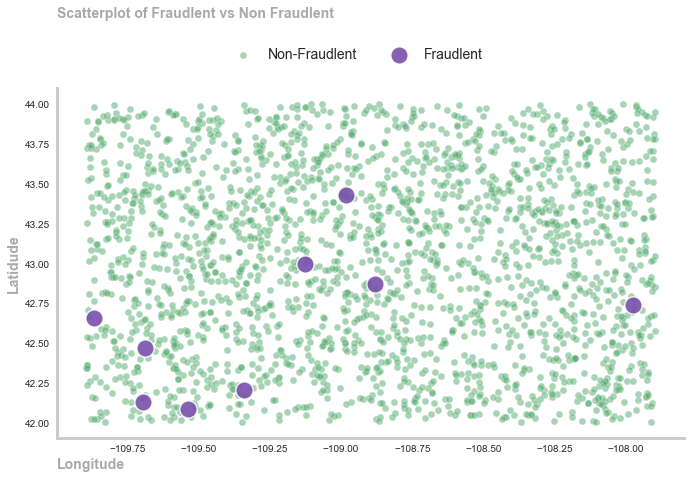

In [94]:
#Unknown (unknown). Specifying colors. https://matplotlib.org/stable/users/explain/colors/colors.html. [Accessed 2 May, 2024]
# Set style of plot
sns.set_style('whitegrid')

# plot scatter plot
plt.figure(figsize=(10,6))

# plot non fraudlent tranasctions
sns.scatterplot(x='merch_long', y='merch_lat', data=df_spatial[df_spatial['is_fraud']==0], c='#50AB6A', label='Non-Fraudlent', alpha=0.5)
                                                                               
# plot  fraudlent tranasctions with larger size and different color
sns.scatterplot(x='merch_long', y='merch_lat', data=df_spatial[df_spatial['is_fraud']==1], c='#7950AB', label='Fraudlent', alpha=0.9, s=300)                                                                              

# Customize labels & titles                                                              
plt.xlabel('Longitude',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Latidude',fontsize=14,fontweight='bold',color='darkgrey')
plt.title('Scatterplot of Fraudlent vs Non Fraudlent',fontsize=14,fontweight='bold',color='darkgrey', pad=70,loc='left')
                                                              
# Customize legend                                                             
plt.legend(bbox_to_anchor=(0.70,1.15), ncol=2, frameon=False, fontsize=14)

# Adding a figure label
#plt.figtext(0.5,-0.111,'Figure 29', ha='center', va='center',fontsize=16, fontweight='bold')
                                                               
# Remove Grid and dispaly plot                                                             
sns.despine()
plt.grid(False)
plt.show;

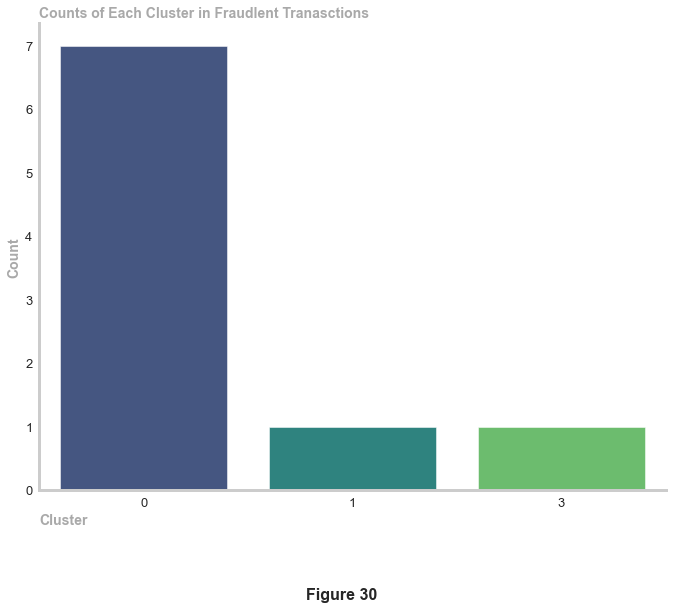

In [95]:
# Create a Bar Graph
plt.figure(figsize=(10,8))
sns.countplot(x='Cluster', data=fraudulent_transactions, palette='viridis')

# Customis labels & graphs
plt.xlabel("Cluster",fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel("Count",fontsize=14,fontweight='bold',color='darkgrey')
plt.title('Counts of Each Cluster in Fraudlent Tranasctions',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.grid(False)

# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 30', ha='center', va='center',fontsize=16, fontweight='bold')
# Shoe the Plot   
plt.show()

In [96]:
# Create a contigency table with probalities
contingency_table= pd.crosstab(index=fraudulent_transactions['Cluster'], columns='count', normalize='all')

# Display the contingency Table for Probalilities of each cluster 
print('Contingency Table for Probabilities of Each Cluster in Fraudulent Transactions')
print(contingency_table)

Contingency Table for Probabilities of Each Cluster in Fraudulent Transactions
col_0       count
Cluster          
0        0.777778
1        0.111111
3        0.111111


In [97]:
# Check spatial dataframe
df_spatial.head(5)

,merch_lat,merch_long,is_fraud,Cluster
0,42.945526,-108.530901,0,3
1,42.193130,-108.682054,0,3
2,43.932724,-109.699794,0,1
3,43.546064,-109.212939,0,1
4,42.876538,-109.333220,0,0


In [98]:
# Define a mapping dictionary for probabilities
probabilities_mapping= {0: 0.77, 1:0.00, 2:0.11, 3:0.11}

# Replace the cluster labels with their probabilities
df_spatial['Spatial Probability '] = df_spatial['Cluster'].map(probabilities_mapping)


# Dispaly the Dataframe
df_spatial.head(1)

,merch_lat,merch_long,is_fraud,Cluster,Spatial Probability
0,42.945526,-108.530901,0,3,0.11


In [99]:
# Drop Cluster columnd
df_spatial=df_spatial.drop(columns=['Cluster'])

In [100]:
# Check New dataframe
df_spatial.head(1)

,merch_lat,merch_long,is_fraud,Spatial Probability
0,42.945526,-108.530901,0,0.11


# Time Analysis

In [101]:
# Create datadrame to analyse time
df_time=df_fraud[['merch_lat','is_fraud','Time_hour']]

In [102]:
# Create a dataframe using merch_la & Merch_long
scaled_time=df_time[['Time_hour']]

In [103]:
# Within Cluster Sum of Squares
wcss = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_time)
    wcss.append(kmeans.inertia_)
print(wcss)

[26577.053436576556, 10251.642545218729, 6263.684291427724, 3587.8218678086623, 2556.259947122773]


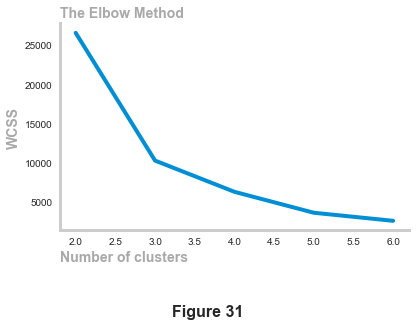

In [104]:
# Initialize an empty list to store the within cluster sum of squares (WCSS)
wcss = []

# Loop through different numbers of clusters
for i in range(2, 7):
    # Initialize Kmeans clustering algorithm with current number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                random_state = 42)
    # Fit KMeans to the scaled data
    kmeans.fit(scaled_time)
    
    # Append the wcss to the list
    wcss.append(kmeans.inertia_)
    
# plot the elbow method graph
plt.plot(range(2, 7), wcss)

# Customize plot title & labels
plt.title('The Elbow Method',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Number of clusters',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('WCSS',fontsize=14,fontweight='bold',color='darkgrey')

# turn off the grid & despine the plot
plt.grid(False)
sns.despine()

# Adjust the layout
plt.tight_layout()

# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 31', ha='center', va='center',fontsize=16, fontweight='bold')

# Display the plot
plt.show()

In [105]:
# Use silhouette score to get better cluster using kmeans ++ to mitigate local minima
for i in range (2,7):
    kmeans=KMeans(n_clusters=i,max_iter=40, n_init=10, init='k-means++').fit(scaled_time)
    cluster_labels=kmeans.labels_
    silhouette_avg=silhouette_score(scaled_time,cluster_labels)
    print('for N_Clusters ={}, the silhouette score using the kmeans ++ is {:.2f}' .format(i,silhouette_avg))

for N_Clusters =2, the silhouette score using the kmeans ++ is 0.63
for N_Clusters =3, the silhouette score using the kmeans ++ is 0.61
for N_Clusters =4, the silhouette score using the kmeans ++ is 0.59
for N_Clusters =5, the silhouette score using the kmeans ++ is 0.61
for N_Clusters =6, the silhouette score using the kmeans ++ is 0.60


In [106]:
# Fit kmeans algorithm
kmeans = KMeans(n_clusters=3, n_init=10,init='k-means++', random_state=42).fit(scaled_time)
clusters=kmeans.labels_

# add clusters to customer details
df_time['Cluster']=clusters

# Visualize customer details
df_time.head()

,merch_lat,is_fraud,Time_hour,Cluster
0,42.945526,0,13,2
1,42.193130,0,16,2
2,43.932724,0,7,0
3,43.546064,0,15,2
4,42.876538,0,12,2


In [107]:
# Filter rows where is fraud =1
fraudulent_tranasctions= df_time[df_time['is_fraud']==1]

# Display filtered dataframe
fraudulent_transactions.head(9)

,merch_lat,merch_long,is_fraud,Cluster
793,43.432352,-108.982476,1,1
794,42.656763,-109.868240,1,0
795,42.084862,-109.537321,1,0
796,42.739276,-107.975363,1,3
797,42.204230,-109.341230,1,0
798,42.468523,-109.687147,1,0
799,42.869714,-108.879962,1,0
800,42.132393,-109.694820,1,0
801,42.995377,-109.128294,1,0


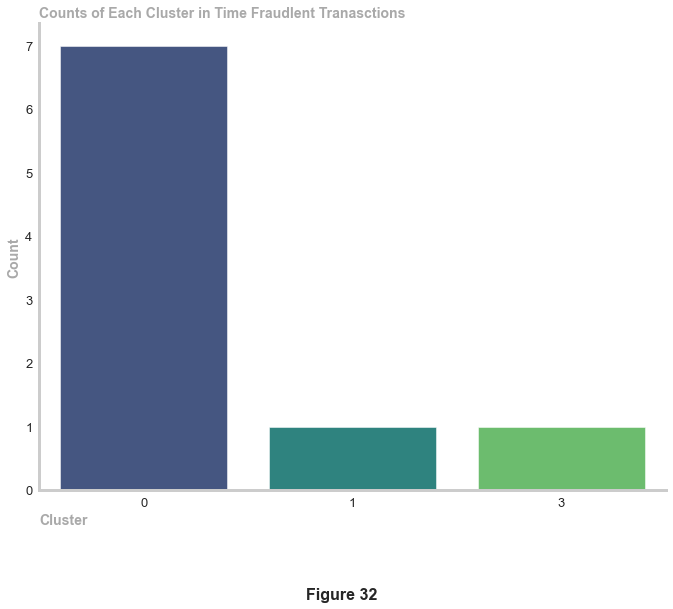

In [108]:
# Create a Bar Graph
plt.figure(figsize=(10,8))
sns.countplot(x='Cluster', data=fraudulent_transactions, palette='viridis')

# Customis labels & graphs
plt.xlabel("Cluster",fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel("Count",fontsize=14,fontweight='bold',color='darkgrey')
plt.title('Counts of Each Cluster in Time Fraudlent Tranasctions',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.grid(False)

# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 32', ha='center', va='center',fontsize=16, fontweight='bold')
# Shoe the Plot   
plt.show()

In [109]:
# Create a contigency table with probalities
contingency_table_time= pd.crosstab(index=fraudulent_transactions['Cluster'], columns='count', normalize='all')

# Display the contingency Table for Probalilities of each cluster 
print('Contingency Table for Probabilities of Each Cluster in Fraudulent Transactions')
print(contingency_table_time)

Contingency Table for Probabilities of Each Cluster in Fraudulent Transactions
col_0       count
Cluster          
0        0.777778
1        0.111111
3        0.111111


In [110]:
# Define a mapping dictionary for probabilities
probabilities_mapping= {0: 0.77, 1:0.00, 2:0.11, 3:0.11,4:.00,5:.00,6:.00}

# Replace the cluster labels with their probabilities
df_time['Time Probability '] = df_time['Cluster'].map(probabilities_mapping)


# Dispaly the Dataframe
df_time.head(5)

,merch_lat,is_fraud,Time_hour,Cluster,Time Probability
0,42.945526,0,13,2,0.11
1,42.193130,0,16,2,0.11
2,43.932724,0,7,0,0.77
3,43.546064,0,15,2,0.11
4,42.876538,0,12,2,0.11


In [111]:
# Drop Cluster column
df_time=df_time.drop(columns=['Cluster'])

In [112]:
# Merge spatial and temporal datasets
df_combined = pd.merge(df_time, df_spatial, on='merch_lat')

In [113]:
# Check the dataframe
df_combined.head(1)

,merch_lat,is_fraud_x,Time_hour,Time Probability,merch_long,is_fraud_y,Spatial Probability
0,42.945526,0,13,0.11,-108.530901,0,0.11


In [114]:
# Drop  column
df_combined=df_combined.drop(columns=['merch_long','is_fraud_y','Time_hour'])

In [115]:
# Check the dataframe
df_combined.head(1)

,merch_lat,is_fraud_x,Time Probability,Spatial Probability
0,42.945526,0,0.11,0.11


# Distance Analysis

In [116]:
# Create dataframe to analyse time
df_distance=df_fraud[['lat','long','merch_lat','merch_long','is_fraud']]

In [117]:
# Check if scaled_distance_new is a DataFrame
if isinstance(df_distance, pd.DataFrame):
    print("scaled_distance_new is a DataFrame")
else:
    print("scaled_distance_new is not a DataFrame")

scaled_distance_new is a DataFrame


In [118]:
# Create a dataframe using merch_la & Merch_long
scaled_distance=df_distance[['lat','long','merch_lat','merch_long','is_fraud']]

In [119]:
#unknown (unknown). Haversine formula in Python (bearing and distance between two GPS points). https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points. [Accessed 19th April, 2024]

from math import radians, sin,asin, sqrt,cos
# Iterate over  each row of the dataset

for index, row in scaled_distance.iterrows():
    # Extract latitude & longitude coordinates for the starting point and credit card use
    lat1=radians(row['lat'])
    lon1=radians(row['long'])
    lat2=radians(row['merch_lat'])
    lon2=radians(row['merch_long'])
    
    # Calulate the distance traveled using the calculate distance function
    dlon= lon2 -lon1
    dlat= lat2 -lat1
                 
     # Haversine formula
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*asin(sqrt(min(a,1)))  
    distance = 6371 * c   # Earth Radius in kilometres
    
    # Assign the calculated distances to a new column in the datframe
    scaled_distance.loc[index, 'distance_traveled'] = distance

In [120]:
# Create dataframe
scaled_distance=pd.DataFrame(scaled_distance)

In [121]:
# Check columns
scaled_distance.columns

Index(['lat', 'long', 'merch_lat', 'merch_long', 'is_fraud',
       'distance_traveled'],
      dtype='object')

In [122]:
# Check distibution of dataframe
scaled_distance.describe()

,lat,long,merch_lat,merch_long,is_fraud,distance_traveled
count,2.196000e+03,2.196000e+03,2196.000000,2196.000000,2196.000000,2196.000000
mean,4.300480e+01,-1.088964e+02,43.013833,-108.886100,0.004098,73.500496
std,8.102032e-13,1.805190e-12,0.569438,0.579133,0.063902,28.705891
min,4.300480e+01,-1.088964e+02,42.006790,-109.896116,0.000000,2.086654
25%,4.300480e+01,-1.088964e+02,42.523979,-109.373853,0.000000,52.914339
50%,4.300480e+01,-1.088964e+02,43.024439,-108.886791,0.000000,74.758052
75%,4.300480e+01,-1.088964e+02,43.480145,-108.370315,0.000000,95.484190
max,4.300480e+01,-1.088964e+02,44.004524,-107.897193,1.000000,137.124827


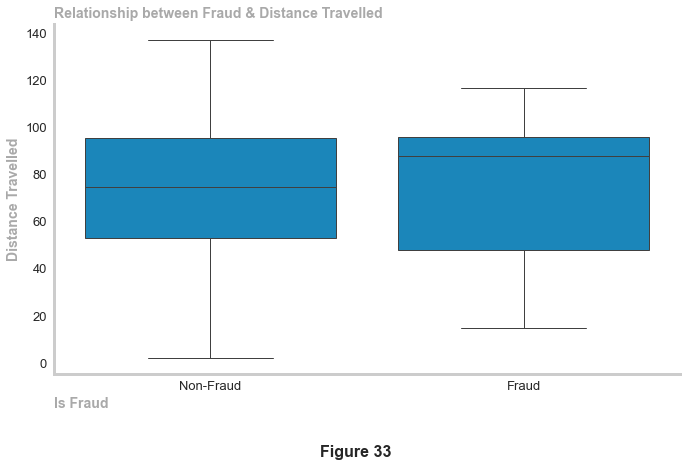

In [123]:
# Set the style
sns.set_style('whitegrid')

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='distance_traveled', data=scaled_distance)

# Customize labels & graphs
plt.xlabel("Is Fraud", fontsize=14, fontweight='bold', color='darkgrey', loc='left')
plt.ylabel("Distance Travelled", fontsize=14, fontweight='bold', color='darkgrey')
plt.title('Relationship between Fraud & Distance Travelled', fontsize=14, fontweight='bold', color='darkgrey', loc='left')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], fontsize=13)  # Customizing x-axis ticks
plt.yticks(fontsize=13)
sns.despine()
plt.grid(False)

# Adding a figure label
plt.figtext(0.5, -0.111, 'Figure 33', ha='center', va='center', fontsize=16, fontweight='bold')

# Show the Plot   
plt.show()


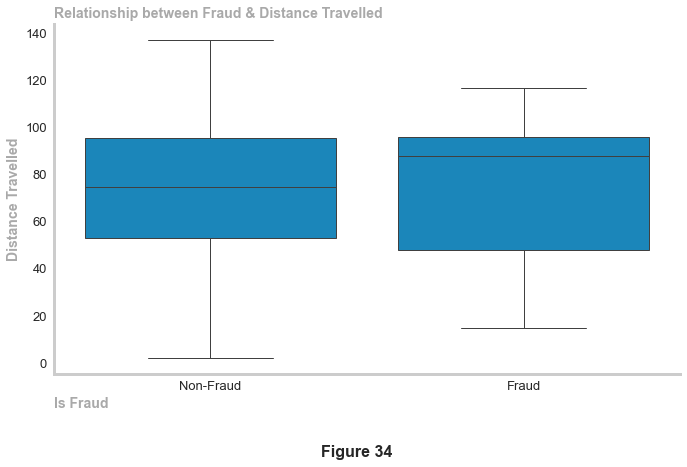

In [124]:
# Set the style
sns.set_style('whitegrid')

# Create a box plot or violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='distance_traveled', data=scaled_distance)
# Customis labels & graphs
plt.xlabel("Is Fraud",fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel("Distance Travelled",fontsize=14,fontweight='bold',color='darkgrey')
plt.title('Relationship between Fraud & Distance Travelled',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'],fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.grid(False)

# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 34', ha='center', va='center',fontsize=16, fontweight='bold')
# Show the Plot   
plt.show()

It seems that there is a slight difference on the mean distance traveled between fraudulent and non fraudulent tranasctions, however the standard deviation is higher for fraudulent tranasctions, indicating more variability in the distance traveled for fraud cases. Also the minimun distance traveled for fraudulent tranasctions is higher compared to non fraudulent transactions.

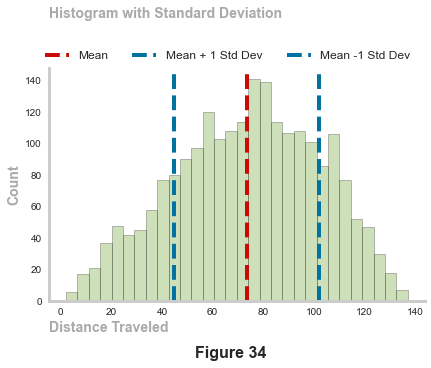

In [125]:
#Nilimesh Halder, PhD (2024). Unlocking the Secrets of Data Variability: A Deep Dive into Standard Deviation with Python. https://medium.com/gitconnected/unlocking-the-secrets-of-data-variability-a-deep-dive-into-standard-deviation-with-python-e0aaf51d4149. [Accessed 22th April, 2024]

distance_traveled=scaled_distance['distance_traveled']

mean = np.mean(distance_traveled)
std_dev = np.std(distance_traveled)


plt.hist(distance_traveled, bins=30, alpha=0.5, color='g', edgecolor='black')
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(mean + std_dev, color='b', linestyle='--',label='Mean + 1 Std Dev')
plt.axvline(mean - std_dev, color='b', linestyle='--', label='Mean -1 Std Dev')
plt.title('Histogram with Standard Deviation ',fontsize=14,fontweight='bold',color='darkgrey',loc='left', pad=50)
plt.xlabel('Distance Traveled',fontsize=14,fontweight='bold',color='darkgrey',loc='left' )
plt.ylabel('Count',fontsize=14,fontweight='bold',color='darkgrey')
sns.despine()
plt.grid(False)
# Add a legend
plt.legend(bbox_to_anchor=(0.99,1.12), ncol=3, frameon=False, fontsize=12)
# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 34', ha='center', va='center',fontsize=16, fontweight='bold')
# Show the Plot   
plt.show()

In [126]:
# Filter the dataframe to include only rows wher fraud equal 1
fraudulent_transactions_dist= scaled_distance[scaled_distance['is_fraud']==1]
# Check the distribution on the fraud column
fraudulent_transactions_dist.describe()

,lat,long,merch_lat,merch_long,is_fraud,distance_traveled
count,9.000000e+00,9.000000e+00,9.000000,9.000000,9.0,9.000000
mean,4.300480e+01,-1.088964e+02,42.620388,-109.232761,1.0,74.100686
std,7.536444e-15,1.507289e-14,0.447032,0.581742,0.0,38.144266
min,4.300480e+01,-1.088964e+02,42.084862,-109.868240,1.0,15.080365
25%,4.300480e+01,-1.088964e+02,42.204230,-109.687147,1.0,48.050543
50%,4.300480e+01,-1.088964e+02,42.656763,-109.341230,1.0,87.900050
75%,4.300480e+01,-1.088964e+02,42.869714,-108.982476,1.0,96.175966
max,4.300480e+01,-1.088964e+02,43.432352,-107.975363,1.0,116.983430


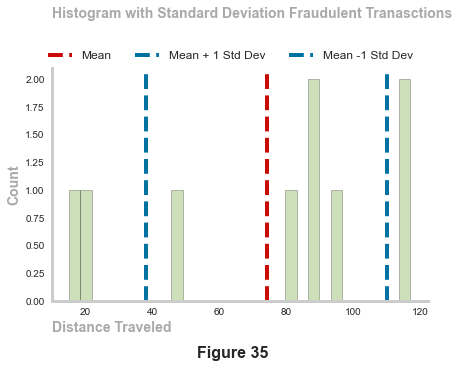

In [127]:
#Nilimesh Halder, PhD (2024). Unlocking the Secrets of Data Variability: A Deep Dive into Standard Deviation with Python. https://medium.com/gitconnected/unlocking-the-secrets-of-data-variability-a-deep-dive-into-standard-deviation-with-python-e0aaf51d4149. [Accessed 22th April, 2024]

distance_traveled=fraudulent_transactions_dist['distance_traveled']

mean = np.mean(distance_traveled)
std_dev = np.std(distance_traveled)


plt.hist(distance_traveled, bins=30, alpha=0.5, color='g', edgecolor='black')
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(mean + std_dev, color='b', linestyle='--',label='Mean + 1 Std Dev')
plt.axvline(mean - std_dev, color='b', linestyle='--', label='Mean -1 Std Dev')
plt.title('Histogram with Standard Deviation Fraudulent Tranasctions ',fontsize=14,fontweight='bold',color='darkgrey',loc='left', pad=50)
plt.xlabel('Distance Traveled',fontsize=14,fontweight='bold',color='darkgrey',loc='left' )
plt.ylabel('Count',fontsize=14,fontweight='bold',color='darkgrey')
sns.despine()
plt.grid(False)
# Add a legend
plt.legend(bbox_to_anchor=(0.99,1.12), ncol=3, frameon=False, fontsize=12)
# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 35', ha='center', va='center',fontsize=16, fontweight='bold')

# Show the Plot   
plt.show()

In [128]:
#  Create new column for standard deviation

scaled_distance['distance_std'] = scaled_distance['distance_traveled'].std()

#  Display the dataframe
scaled_distance.head(1)

,lat,long,merch_lat,merch_long,is_fraud,distance_traveled,distance_std
0,43.0048,-108.8964,42.945526,-108.530901,0,30.457093,28.705891


In [129]:
#  Create new feature
scaled_distance_new=scaled_distance['distance_traveled']

In [130]:
#  Ensure dataframe
scaled_distance_new=pd.DataFrame(scaled_distance)

In [131]:
# Drop Cluster column
scaled_distance=scaled_distance.drop(columns=['lat','long','merch_long','is_fraud','distance_traveled'])

In [132]:
# Merge spatial and temporal datasets
df_combined = pd.merge(df_combined, scaled_distance, on='merch_lat')

In [133]:
#  Check first 5 lines of dataframe
df_combined.head(-5)

,merch_lat,is_fraud_x,Time Probability,Spatial Probability,distance_std
0,42.945526,0,0.11,0.11,28.705891
1,42.193130,0,0.11,0.11,28.705891
2,43.932724,0,0.77,0.00,28.705891
3,43.546064,0,0.11,0.00,28.705891
4,42.876538,0,0.11,0.77,28.705891
...,...,...,...,...,...
2198,43.423431,0,0.11,0.00,28.705891
2199,43.722708,0,0.11,0.11,28.705891
2200,42.754287,0,0.11,0.77,28.705891
2201,43.170531,0,0.00,0.00,28.705891


In [134]:
# Drop Cluster column
df_fraud=df_fraud.drop(columns=['category','lat','long','merch_long','is_fraud','Day','Month','Time_hour','Day_Night'])

In [135]:
# Merge spatial and temporal datasets
df_combined = pd.merge(df_combined, df_fraud, on='merch_lat')

In [136]:
# Check dataframe head
df_combined.head(1)

,merch_lat,is_fraud_x,Time Probability,Spatial Probability,distance_std,trans_date_trans_time
0,42.945526,0,0.11,0.11,28.705891,2020-06-21 13:05:42


In [137]:
# Set trans_date_trans_time as index
df_combined.set_index('trans_date_trans_time', inplace=True)

In [138]:
#  Check distibution of dataframe
df_combined.describe()

,merch_lat,is_fraud_x,Time Probability,Spatial Probability,distance_std
count,2224.000000,2224.000000,2224.000000,2224.000000,2.224000e+03
mean,43.012307,0.004047,0.217379,0.252397,2.870589e+01
std,0.567638,0.063500,0.306098,0.306794,8.421825e-13
min,42.006790,0.000000,0.000000,0.000000,2.870589e+01
25%,42.518755,0.000000,0.000000,0.110000,2.870589e+01
50%,43.024439,0.000000,0.110000,0.110000,2.870589e+01
75%,43.475775,0.000000,0.110000,0.770000,2.870589e+01
max,44.004524,1.000000,0.770000,0.770000,2.870589e+01


In [139]:
#  Check distibution of dataframe where fraud occurs 
fraudulent_df=df_combined[df_combined['is_fraud_x']==1]
fraudulent_df.describe()

,merch_lat,is_fraud_x,Time Probability,Spatial Probability,distance_std
count,9.000000,9.0,9.000000,9.000000,9.000000e+00
mean,42.620388,1.0,0.171111,0.611111,2.870589e+01
std,0.447032,0.0,0.339538,0.316482,3.768222e-15
min,42.084862,1.0,0.000000,0.000000,2.870589e+01
25%,42.204230,1.0,0.000000,0.770000,2.870589e+01
50%,42.656763,1.0,0.000000,0.770000,2.870589e+01
75%,42.869714,1.0,0.000000,0.770000,2.870589e+01
max,43.432352,1.0,0.770000,0.770000,2.870589e+01


# Statistical Analysis

In [140]:
# Separate the data into groups fot testing
frauds= df_combined[df_combined['is_fraud_x'] == 1 ]['distance_std']
non_frauds= df_combined[df_combined['is_fraud_x'] == 0]['distance_std']

# Perform T test
t_statistic, p_value = stats.ttest_ind(frauds, non_frauds)

# Print the results
print('T-statistic', t_statistic)
print ('P-Value', p_value)

T-statistic 5.98515442209663
P-Value 2.513587467774497e-09


The null hypothesis (H0) is that there is no statiscal difference between the means of standard deviation for fraud & non fraud. The alternative hypothesis (H1) is that there is statiscal difference between the means of standard deviation for fraud & non fraud.

Since the p-value(.1825) is greater than the significance level of .005. we fail to reject the the null hypothesis. This suggest that there is not enough evidence to conclude that there is a significant difference in the means of the standard deviation scores for frauds & non fraudulent tranasctions.



In [141]:
# Separate the data into groups fot testing
frauds= df_combined[df_combined['is_fraud_x'] == 1 ]['Spatial Probability ']
non_frauds= df_combined[df_combined['is_fraud_x'] == 0]['Spatial Probability ']

# Perform T test
t_statistic, p_value = stats.ttest_ind(frauds, non_frauds)

# Print the results
print('T-statistic', t_statistic)
print ('P-Value', p_value)

T-statistic 3.5238420886196655
P-Value 0.00043393158804473755


The null hypothesis for the spatial columns (H0) is that there is no statiscal difference between the means of spatial probability scores for fraud & non fraud. The alternative hypothesis (H1) is that there is statiscal difference between the means of spatial probability for fraud & non fraud.

Since the p-value(.004) is lower than the significance level of .005. we reject the the null hypothesis. This suggest that there is enough evidence to conclude that there is a significant difference in the means of the spatial scores for frauds & non fraudulent tranasctions.

In [142]:
# Separate the data into groups fot testing
frauds= df_combined[df_combined['is_fraud_x'] == 1 ]['Time Probability ']
non_frauds= df_combined[df_combined['is_fraud_x'] == 0]['Time Probability ']

# Perform T test
t_statistic, p_value = stats.ttest_ind(frauds, non_frauds)

# Print the results
print('T-statistic', t_statistic)
print ('P-Value', p_value)

T-statistic -0.4542967317888061
P-Value 0.6496596408306274


The null hypothesis for the Time columns (H0) is that there is no statiscal difference between the means of time probability scores for fraud & non fraud. The alternative hypothesis (H1) is that there is statiscal difference between the means of time probability for fraud & non fraud.

Since the p-value(.64) is lower than the significance level of .005. we can not reject the the null hypothesis. This suggest that there is not enough evidence to conclude that there is a significant difference in the means of the time scores for frauds & non fraudulent tranasctions.

# Time Analysis Revisited

In [143]:
# Recall dataset
df_day_night.head(1)

,trans_date_trans_time,category,lat,long,merch_lat,merch_long,is_fraud,Day,Month,Time_hour,Day_Night
0,2020-06-21 13:05:42,home,43.0048,-108.8964,42.945526,-108.530901,0,21,6,13,Afternoon


In [144]:
# Filter the dataframe to include only rows wher fraud equal 1
fraudulent_transactions_fraud= df_day_night[df_day_night['is_fraud']==1]

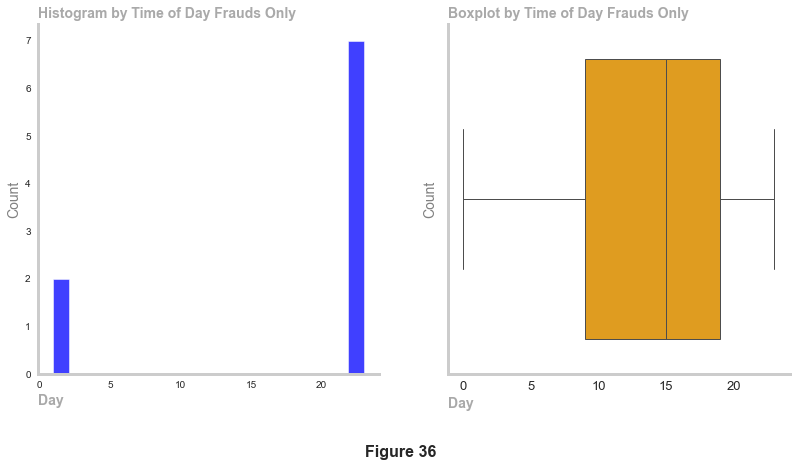

In [145]:
# Setting the style of the histogram to whitegrid
sns.set_style('whitegrid')


# Creating subplots for the histogrm & boxplot
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# filter the frauds 
df_day_night_fraud= df_day_night[df_day_night['is_fraud'] ==1]

# Convert "amount" column to a NumPy array
amount_values = df_day_night_fraud['Time_hour'].values
sns.histplot(df_day_night_fraud, x="Time_hour", bins=20,  color='blue',kde=False, ax=axs[0])
axs[0].set_title('Histogram by Time of Day Frauds Only',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
axs[0].set_xlabel('Day',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
axs[0].set_ylabel('Count',fontsize=14,color= 'grey')
axs[0].xaxis.grid(False)
axs[0].yaxis.grid(False)

# Creating a boxplot using the amount column
sns.boxplot(df_day_night, x="Time_hour", color='orange', ax=axs[1])
axs[1].set_title('Boxplot by Time of Day Frauds Only',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Day',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')


# Adjusting tick sizes for x,y axis, despine figures, remove grid lines from the graphs
sns.despine(ax=axs[0])
sns.despine(ax=axs[1])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(False)

## Adding a figure label
plt.figtext(0.5,-0.111,'Figure 36', ha='center', va='center',fontsize=16, fontweight='bold')
# Displaying the plots
plt.show()


# Mahesh Tiwari,2023.Complete Exploratory Data Analysis (EDA)of Loan Data and Visualization: Understanding Loan Characteristics and Default Patterns..Available at: https://medium.com/nerd-for-tech/complete-exploratory-data-analysis-eda-of-loan-data-and-visualization-understanding-loan-120651cfefc8 [Accesed] 03-12-2023]

In [146]:
# Define a mapping function to assign risk levels based on time intervals
def assign_risk_level(Time_hour):
    if Time_hour >= 20 or Time_hour < 5:
        return 1  # High risk
    elif 5 <= Time_hour < 12:
        return 2  # Low Risk
    else:
        return 3  # Medium Risk
    
# Apply the mapping function to create a new feature Risk Level
df_day_night['Risk_level'] = df_day_night['Time_hour'].apply(assign_risk_level)

# Check data

df_day_night.head(1)

,trans_date_trans_time,category,lat,long,merch_lat,merch_long,is_fraud,Day,Month,Time_hour,Day_Night,Risk_level
0,2020-06-21 13:05:42,home,43.0048,-108.8964,42.945526,-108.530901,0,21,6,13,Afternoon,3


In [147]:
# filter the frauds 
df_time_fraud= df_day_night[df_day_night['is_fraud'] ==1]

In [148]:
# Create a Frrequency table
frequency_table= df_time_fraud['Risk_level'].value_counts()

# print frequency table
print(" Frequency Table for Risk Levels")
print(frequency_table)

 Frequency Table for Risk Levels
Risk_level
1    9
Name: count, dtype: int64


In [149]:
# Define a mapping dictionary for probabilities
probabilities_mapping= { 1:1.00, 2:0.00, 3:0.00}

# Replace the cluster labels with their probabilities
df_day_night['Time Probability New '] = df_day_night['Risk_level'].map(probabilities_mapping)


# Dispaly the Dataframe
df_day_night.head(1)

,trans_date_trans_time,category,lat,long,merch_lat,merch_long,is_fraud,Day,Month,Time_hour,Day_Night,Risk_level,Time Probability New
0,2020-06-21 13:05:42,home,43.0048,-108.8964,42.945526,-108.530901,0,21,6,13,Afternoon,3,0.0


In [150]:
# Separate the data into groups for testing
frauds= df_day_night[df_day_night['is_fraud'] == 1 ]['Time Probability New ']
non_frauds= df_day_night[df_day_night['is_fraud'] == 0]['Time Probability New ']

# Perform T test
t_statistic, p_value = stats.ttest_ind(frauds, non_frauds)

# Print the results
print('T-statistic', t_statistic)
print ('P-Value', p_value)

T-statistic 4.027384977923458
P-Value 5.8318451334231164e-05


The null hypothesis for the Time columns (H0) is that there is no statiscal difference between the means of time probability scores for fraud & non fraud. The alternative hypothesis (H1) is that there is statiscal difference between the means of time probability for fraud & non fraud.

Since the p-value(6.70) is higher than the significance level of .005. we can reject the the null hypothesis. This suggest that there is enough evidence to conclude that there is a significant difference in the means of the time scores for frauds & non fraudulent tranasctions.

In [151]:
# Drop Cluster column
df_day_night=df_day_night.drop(columns=['category','lat','long','merch_long','is_fraud','Day','Month','Time_hour','Day_Night','Risk_level'])

In [152]:
# Drop Cluster column
df_combined=df_combined.drop(columns=['Time Probability '])

In [153]:
# Merge  datasets
df_combined = pd.merge(df_combined, df_day_night, on='merch_lat')

In [154]:
#  Check first row of dataset
df_combined.head(1)

,merch_lat,is_fraud_x,Spatial Probability,distance_std,trans_date_trans_time,Time Probability New
0,42.945526,0,0.11,28.705891,2020-06-21 13:05:42,0.0


In [155]:
# Drop Cluster column
df_combined=df_combined.drop(columns=['merch_lat'])

In [156]:
# filter the frauds 
df_combined_fraud= df_combined[df_combined['is_fraud_x'] ==1]

In [157]:
# Rearrange columns in order

new_columns=['trans_date_trans_time','Spatial Probability ','distance_std','Time Probability New ',
            'is_fraud_x',]

df_combined=df_combined.reindex(columns=new_columns)
# Check columns
df_combined.head(1)

,trans_date_trans_time,Spatial Probability,distance_std,Time Probability New,is_fraud_x
0,2020-06-21 13:05:42,0.11,28.705891,0.0,0


In [158]:
# Rename columns
df_combined.rename(columns={'trans_date_trans_time': 'Transaction','Spatial Probability ':'Spatial',
                  'distance_std':'Distance','Time Probability New ':'Time',
                  'is_fraud_x': 'Fraud'}, inplace=True)

# Pipeline Models 

In [159]:
# Separating features in to x & y
X = df_combined.drop(columns=["Fraud","Transaction"])
y = df_combined.Fraud

# Selecting features from the numerical columns
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()
num_cols

# Selecting features from the categorical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
cat_cols

# Divide data into train & Test split use stratify for even classes
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.20,random_state=42, stratify=y)

# Define preprocessing for numerical columns
numeric_preprocessor = Pipeline(
    steps=[
        ('knn_imputer', KNNImputer(n_neighbors=3)),
        ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_preprocessor = Pipeline(
    steps=[(('imputer', SimpleImputer(missing_values=np.nan, strategy='constant'))),
           ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Define processor to preprocess numerical & categorical data
preprocessor = ColumnTransformer(
    [('categorical', categorical_preprocessor, cat_cols),
        ('numerical', numeric_preprocessor, num_cols)])

# Construct pipline with preprocessing, dimensionality reduction, and model
pipe = make_pipeline(preprocessor, PCA(n_components=0.90), RandomForestClassifier())

# View the pipeline
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('numerical',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer(n_neighbors=3)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Spatial', 'Distance',
                                                   'Time'])])),
                ('pca', PCA(n_components=0.9)),
                ('randomforestclassifier', RandomForestClassifier())])

In [160]:
# Get pipeline parameters
pipeline_params = pipe.get_params()

# Print pipeline parameters
print(pipeline_params)

{'memory': None, 'steps': [('columntransformer', ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 []),
                                ('numerical',
                                 Pipeline(steps=[('knn_imputer',
                                                  KNNImputer(n_neighbors=3)),
                                                 ('scaler', StandardScaler())]),
                                 ['Spatial', 'Distance', 'Time'])])), ('pca', PCA(n_components=0.9)), ('randomforestclassifier', RandomForestClassifier())], 'verbose': False, 'columntransformer': ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[(

In [161]:
# Fit the model
clf = pipe.fit(X_train,y_train)

In [162]:
# Get predicted probabilities on the test set
probs=clf.predict_proba(X_test)
                        
probs

array([[0.96955163, 0.03044837],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.99400768, 0.00599232],
       [1.        , 0.        ],
       [0.96955163, 0.03044837],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.99706517, 0.00293483],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.99706517, 0.00293483],
       [0.96955163, 0.03044837],
       [1.        , 0.        ],
       [0.99400768, 0.00599232],
       [0.99706517, 0.00293483],
       [1.        , 0.        ],
       [0.96955163, 0.03044837],
       [0.99706517, 0.00293483],
       [0.99706517, 0.00293483],
       [0.99706517, 0.00293483],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.

Accuracy : 1.00
Classification Report on Random Forest Model :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       450
           1       0.00      0.00      0.00         2

    accuracy                           1.00       452
   macro avg       0.50      0.50      0.50       452
weighted avg       0.99      1.00      0.99       452

Precision on Random Forest model :  0.00
Recall on Random Forest : 0.00


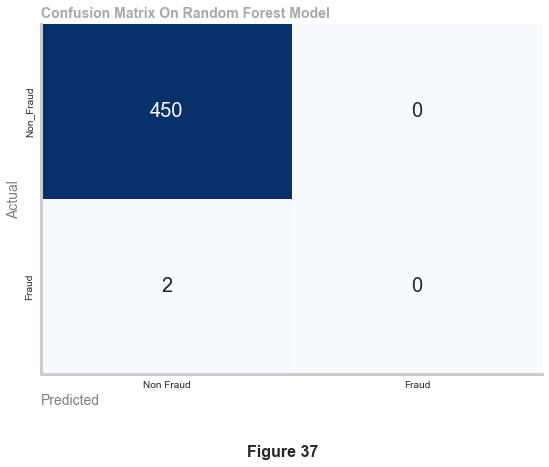

In [163]:
# predict on the test data
y_pred = clf.predict(X_test)

# compute the confusion marix
confusion_matrix(y_test, y_pred)

# calulate accurracy
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy : {accuracy:.2f}')

# print classification model
print ('Classification Report on Random Forest Model :')
print(classification_report(y_test, y_pred))

# calulate precision 7 recall scores
precision= precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print(f'Precision on Random Forest model : {precision: .2f}')
print(f'Recall on Random Forest : {recall:.2f}')


# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non_Fraud', 'Fraud'],annot_kws={'size':20})

# set the plot properties
plt.title('Confusion Matrix On Random Forest Model',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)

# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 37', ha='center', va='center',fontsize=16, fontweight='bold')
plt.show()

In [164]:
# check model accuracy
print('Accuracy of Random Forest Classifier on entire dataset: {:.2f}'.format(clf.score(X, y)*100))

# Check model accurracy on test set for overfitting
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)*100))

Accuracy of Random Forest Classifier on entire dataset: 99.60
Accuracy of Random Forest Classifier on test set: 99.56


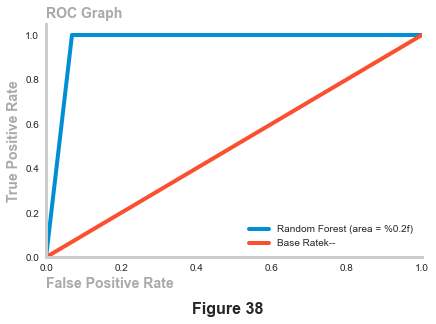

In [165]:
# fit model & check for overfitting using roc curve
probs=clf.predict_proba(X_test)[:, 1]

gb_fpr,gb_tpr,tresholds=roc_curve(y_test,probs)

roc_auc = roc_auc_score(y_test,probs)

# Plot Gradient Boosting ROC
plt.plot(gb_fpr, gb_tpr, label='Random Forest (area = %0.2f)' .format(roc_auc))
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('True Positive Rate',fontsize=14,fontweight='bold',color='darkgrey')
plt.title('ROC Graph',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend(loc="lower right")
#  remove the spine and grid
sns.despine()
plt.grid(False)
# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 38', ha='center', va='center',fontsize=16, fontweight='bold')
plt.show()

#  Hamza b,2018.Building an Employee Churn Model in Python to Develop a Strategic Retention Plan..Available at: https://medium.com/towards-data-science/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d [Accesed] 14-12-2023]

In [166]:
# Perform hyperparameter tuning
param_grid = {
    "randomforestclassifier__n_estimators": [200],
    "randomforestclassifier__max_features": ['sqrt', 'log2'],
    "randomforestclassifier__max_depth": [4, 5],
    "randomforestclassifier__criterion": ["gini", "entropy"]}

# fit pipeline to hyperparameter tuning
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)

# Fit Best param model
grid_search.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         []),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('knn_imputer',
                                                                                          KNNImputer(n_neighbors=3)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Spatial',
                                                                          'Distance',
                                                                          'Time'])])),
                                       ('pca', PCA(n_components=0.9)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': [4, 5],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2'],
                         'randomforestclassifier__n_estimators': [200]})

In [167]:
# get score from best param model
grid_search.best_score_

0.9960108313874774

In [168]:
# View best mode estimators
grid_search.best_params_

{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': 4,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__n_estimators': 200}

In [169]:
# get feature importances 
grid_search.best_estimator_.named_steps['randomforestclassifier'].feature_importances_

array([0.37837534, 0.62162466])

In [170]:
# View features
grid_search.best_estimator_.named_steps['columntransformer'].get_feature_names_out()

array(['numerical__Spatial', 'numerical__Distance', 'numerical__Time'],
      dtype=object)

In [171]:
# Pedregosa et al (JMLR 12, pp. 2825-2830, 201). Scikit-learn: Machine Learning in Python,. https://scikit-learn.org/stable/about.html#citing-scikit-learn. [Accessed 23th April, 2024]

# Calculate feature importances
importances=grid_search.best_estimator_.named_steps['randomforestclassifier'].feature_importances_

# Define feature names
feature_names=['numerical_Spatial', 'numerical_Distance']

# Creat a pandas series with feature importances
mdi_importances= pd.Series(importances, index=feature_names).sort_values(ascending=True)

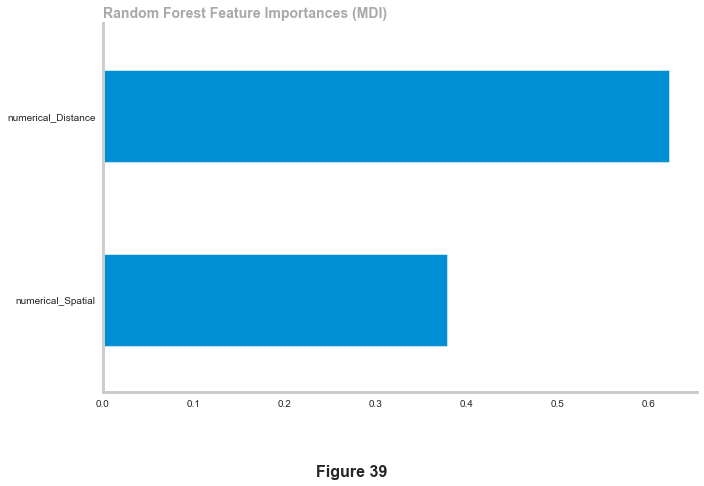

In [172]:
#Pedregosa et al (JMLR 12, pp. 2825-2830, 201). Scikit-learn: Machine Learning in Python,. https://scikit-learn.org/stable/about.html#citing-scikit-learn. [Accessed 23th April, 2024]
plt.figure(figsize=(10, 6))
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)",fontsize=14,fontweight='bold',color='darkgrey',loc='left')
ax.figure.tight_layout()
#  remove the spine and grid
sns.despine()
plt.grid(False)
# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 39', ha='center', va='center',fontsize=16, fontweight='bold')
plt.show() # Show plot



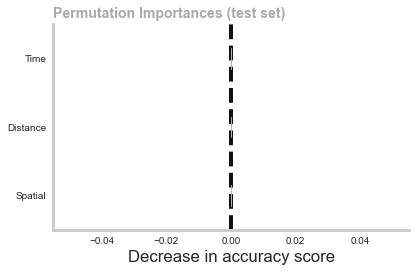

In [173]:
#Pedregosa et al (JMLR 12, pp. 2825-2830, 201). Scikit-learn: Machine Learning in Python,. https://scikit-learn.org/stable/about.html#citing-scikit-learn. [Accessed 23th April, 2024]

from sklearn.inspection import permutation_importance

result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)",fontsize=14,fontweight='bold',color='darkgrey',loc='left')
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()
#  remove the spine and grid
sns.despine()
plt.grid(False)
plt.show() # Show plot

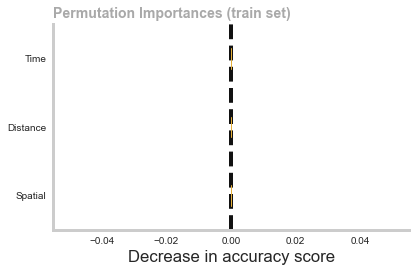

In [174]:
#Pedregosa et al (JMLR 12, pp. 2825-2830, 201). Scikit-learn: Machine Learning in Python,. https://scikit-learn.org/stable/about.html#citing-scikit-learn. [Accessed 23th April, 2024]

result = permutation_importance(
    clf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)",fontsize=14,fontweight='bold',color='darkgrey',loc='left')
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()
#  remove the spine and grid
sns.despine()
plt.grid(False)
plt.show() # Show plot

In [175]:
# Retrieve principal components from the best PCA estimator found during grid search
principal_components = grid_search.best_estimator_.named_steps['pca'].components_

In [176]:
# Retrive principal components from the best pca estimator founf during grid search
grid_search.best_estimator_.named_steps['pca'].components_

array([[ 0.70710678,  0.        , -0.70710678],
       [ 0.70710678,  0.        ,  0.70710678]])

In [177]:
# View the shape od the pca components
grid_search.best_estimator_.named_steps['pca'].components_.shape

(2, 3)

In [178]:
df_combined.head(1)

,Transaction,Spatial,Distance,Time,Fraud
0,2020-06-21 13:05:42,0.11,28.705891,0.0,0


In [179]:
# Create a dataframe using merch_la & Merch_long
scaled_new=df_combined[['Spatial','Distance', 'Time']]

In [180]:
scaled_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Spatial   2256 non-null   float64
 1   Distance  2256 non-null   float64
 2   Time      2256 non-null   float64
dtypes: float64(3)
memory usage: 53.0 KB


In [181]:
Scaler=MinMaxScaler()

In [182]:
scaled_new=scaler.fit_transform(scaled_new)

In [183]:
# Within Cluster Sum of Squares
wcss = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_new)
    wcss.append(kmeans.inertia_)
print(wcss)

[8924.25486333924, 3220.288824242755, 185.9481649021259, 70.05494505494511, 3.1986983434315126e-25]


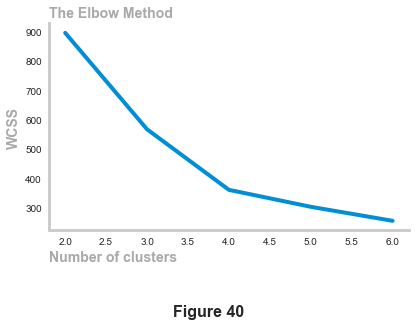

In [184]:
# Initialize an empty list to store the within cluster sum of squares (WCSS)
wcss = []

# Loop through different numbers of clusters
for i in range(2, 7):
    # Initialize Kmeans clustering algorithm with current number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                random_state = 42)
    # Fit KMeans to the scaled data
    kmeans.fit(scaled)
    
    # Append the wcss to the list
    wcss.append(kmeans.inertia_)
    
# plot the elbow method graph
plt.plot(range(2, 7), wcss)

# Customize plot title & labels
plt.title('The Elbow Method',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Number of clusters',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('WCSS',fontsize=14,fontweight='bold',color='darkgrey')

# turn off the grid & despine the plot
plt.grid(False)
sns.despine()

# Adjust the layout
plt.tight_layout()

# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 40', ha='center', va='center',fontsize=16, fontweight='bold')

# Display the plot
plt.show()

In [185]:
# Use silhouette score to get better cluster using kmeans ++ to mitigate local minima
for i in range (2,7):
    kmeans=KMeans(n_clusters=i,max_iter=40, n_init=10, init='k-means++').fit(scaled_time)
    cluster_labels=kmeans.labels_
    silhouette_avg=silhouette_score(scaled_time,cluster_labels)
    print('for N_Clusters ={}, the silhouette score using the kmeans ++ is {:.2f}' .format(i,silhouette_avg))

for N_Clusters =2, the silhouette score using the kmeans ++ is 0.63
for N_Clusters =3, the silhouette score using the kmeans ++ is 0.61
for N_Clusters =4, the silhouette score using the kmeans ++ is 0.59
for N_Clusters =5, the silhouette score using the kmeans ++ is 0.61
for N_Clusters =6, the silhouette score using the kmeans ++ is 0.60


In [186]:
 # fit kmeans algorithm
kmeans = KMeans(n_clusters=3, n_init=10,init='k-means++', random_state=42).fit(scaled_new)
clusters=kmeans.labels_

# add clusters to customer details
df_combined['Cluster']=clusters

# Visualize customer details
df_combined.head()

,Transaction,Spatial,Distance,Time,Fraud,Cluster
0,2020-06-21 13:05:42,0.11,28.705891,0.0,0,0
1,2020-06-21 16:25:36,0.11,28.705891,0.0,0,0
2,2020-06-22 07:58:33,0.00,28.705891,0.0,0,0
3,2020-06-22 15:32:31,0.00,28.705891,0.0,0,0
4,2020-06-23 12:28:54,0.77,28.705891,0.0,0,2


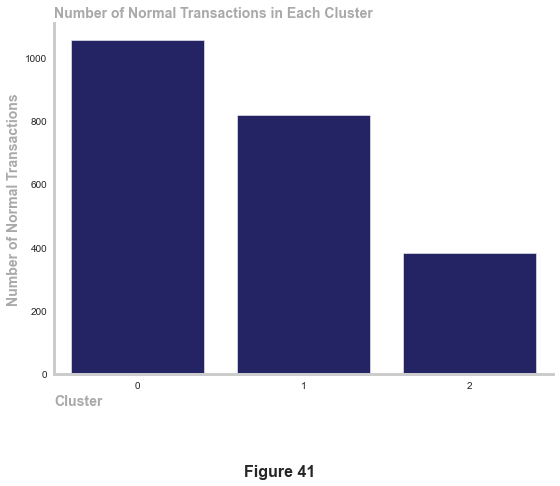

In [187]:
# Count the number of frauds transactions in each cluster
normal_counts= df_combined['Cluster'].value_counts().sort_index()

#  Plot the bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=normal_counts.index, y=normal_counts.values, color='midnightblue')
plt.xlabel('Cluster')
plt.xlabel('Cluster',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Number of Normal Transactions',fontsize=14,fontweight='bold',color='darkgrey',)
plt.title('Number of Normal Transactions in Each Cluster',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
# turn off the grid & despine the plot
plt.grid(False)
sns.despine()

# Adjust the layout
plt.tight_layout()

# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 41', ha='center', va='center',fontsize=16, fontweight='bold')

# Display the plot
plt.show()

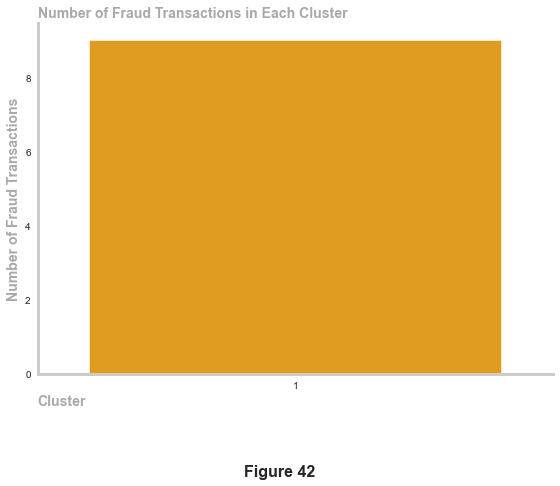

In [188]:
# Count the number of frauds transactions in each cluster
fraud_counts= df_combined[df_combined['Fraud'] ==1]['Cluster'].value_counts().sort_index()

#  Plot the bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, color='orange')
plt.xlabel('Cluster')
plt.xlabel('Cluster',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Number of Fraud Transactions',fontsize=14,fontweight='bold',color='darkgrey',)
plt.title('Number of Fraud Transactions in Each Cluster',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
# turn off the grid & despine the plot
plt.grid(False)
sns.despine()

# Adjust the layout
plt.tight_layout()

# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 42', ha='center', va='center',fontsize=16, fontweight='bold')

# Display the plot
plt.show()


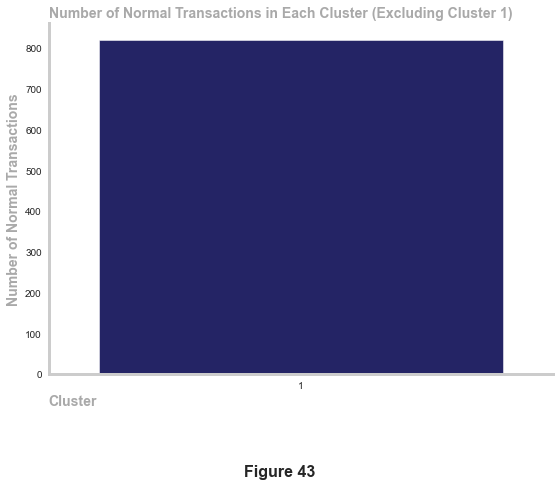

In [189]:
# Filter the dataframe to include only the transactions not in Cluster 1
df_combined_filtered = df_combined[df_combined['Cluster'] == 1]

# Count the number of normal transactions in each cluster for the filtered dataframe
normal_counts_filtered = df_combined_filtered['Cluster'].value_counts().sort_index()

# Plot the bar chart for the filtered data
plt.figure(figsize=(8, 6))
sns.barplot(x=normal_counts_filtered.index, y=normal_counts_filtered.values, color='midnightblue')
plt.xlabel('Cluster', fontsize=14, fontweight='bold', color='darkgrey', loc='left')
plt.ylabel('Number of Normal Transactions', fontsize=14, fontweight='bold', color='darkgrey')
plt.title('Number of Normal Transactions in Each Cluster (Excluding Cluster 1)', fontsize=14, fontweight='bold', color='darkgrey', loc='left')
plt.grid(False)
sns.despine()

# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 43', ha='center', va='center',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [190]:
# Filter Out the fraudlent tranasctions
trans=df_combined[df_combined['Fraud']==1]

print(tabulate(trans.head(9), headers='keys', tablefmt='pretty', numalign='center'))



+-----+---------------------+---------+-------------------+------+-------+---------+
|     |     Transaction     | Spatial |     Distance      | Time | Fraud | Cluster |
+-----+---------------------+---------+-------------------+------+-------+---------+
| 824 | 2019-03-01 01:32:53 |   0.0   | 28.70589126655856 | 1.0  |   1   |    1    |
| 825 | 2019-03-01 02:42:25 |  0.77   | 28.70589126655856 | 1.0  |   1   |    1    |
| 826 | 2019-03-01 23:06:58 |  0.77   | 28.70589126655856 | 1.0  |   1   |    1    |
| 827 | 2019-03-02 22:10:38 |  0.11   | 28.70589126655856 | 1.0  |   1   |    1    |
| 828 | 2019-03-02 22:10:59 |  0.77   | 28.70589126655856 | 1.0  |   1   |    1    |
| 829 | 2019-03-02 23:01:54 |  0.77   | 28.70589126655856 | 1.0  |   1   |    1    |
| 830 | 2019-03-02 23:08:08 |  0.77   | 28.70589126655856 | 1.0  |   1   |    1    |
| 831 | 2019-03-02 23:11:08 |  0.77   | 28.70589126655856 | 1.0  |   1   |    1    |
| 832 | 2019-03-02 23:43:40 |  0.77   | 28.70589126655856 | 1.0  

In [191]:
# Calculate the silhouette score
silhouette_avg= silhouette_score(scaled_new, kmeans.labels_)

print('The  kmeans silhouette after final cluster analysis  score is:', silhouette_avg)

The  kmeans silhouette after final cluster analysis  score is: 0.836683664649611


In [192]:
# Calculate the calinski harabrazz score
calinski_harabasz_score_value= calinski_harabasz_score(scaled_new,kmeans.labels_)
print("Scalinski_harabasz_score  For  KMeans afte final cluster analysis is:", calinski_harabasz_score_value)

Scalinski_harabasz_score  For  KMeans afte final cluster analysis is: 6560.753754143809


In [193]:
# Calculate the  davie bouldin score
davies_bouldin_score_value=davies_bouldin_score(scaled_new,kmeans.labels_)
print("Davies_bouldin_score  For  KMeans after final cluster analysis is:", davies_bouldin_score_value)

Davies_bouldin_score  For  KMeans after final cluster analysis is: 0.3439424148168688


In [194]:
# Check the new columns
df_combined_filtered.columns

Index(['Transaction', 'Spatial', 'Distance', 'Time', 'Fraud', 'Cluster'], dtype='object')

In [195]:
# Check datatypes
df_combined_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 8 to 2254
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Transaction  819 non-null    datetime64[ns]
 1   Spatial      819 non-null    float64       
 2   Distance     819 non-null    float64       
 3   Time         819 non-null    float64       
 4   Fraud        819 non-null    int64         
 5   Cluster      819 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1)
memory usage: 41.6 KB


In [196]:
# Check shape of dataframe
df_combined_filtered.shape

(819, 6)

In [197]:
# Create new features for train test split
X = df_combined_filtered [['Spatial', 'Distance', 'Time', 'Cluster', ]]        

y =  df_combined_filtered['Fraud']         

In [198]:
# Display the label variables of binary types
y.value_counts()

Fraud
0    810
1      9
Name: count, dtype: int64

In [199]:
# Split dataset into training set and test set using stratify to ensure even split off classs
X_train30, X_test30, y_train30, y_test30 = train_test_split(X, y, test_size = 0.30,stratify=y) # 70% training and 30% test
X_train20, X_test20, y_train20, y_test20 = train_test_split(X, y, test_size = 0.20, stratify=y) # 80% training and 20% test
X_train40, X_test40, y_train40, y_test40 = train_test_split(X, y, test_size = 0.40 , stratify=y) # 60% training and 30% test




In [200]:
# Display the rows and columns (dimenions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimenions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train30.shape, X_test30.shape, y_train30.shape, y_test30.shape )

Total number of rows and columns for the complete dataset:  (819, 4) (819,)
Number of rows and columns after splitting dataset:  (573, 4) (246, 4) (573,) (246,)


Accuracy Dummy Classifier: 0.98
Classification Report Dummy classifier:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       243
           1       0.00      0.00      0.00         3

    accuracy                           0.98       246
   macro avg       0.49      0.50      0.50       246
weighted avg       0.98      0.98      0.98       246



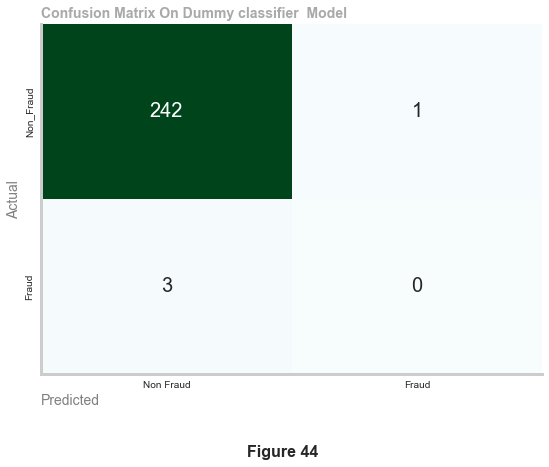

In [201]:
# we have run a dummy classifier as a baseline to compare our models
dummy_classifier=DummyClassifier(strategy='stratified')
dummy_classifier.fit(X_train30,y_train30)

y_pred=dummy_classifier.predict(X_test30)

accuracy=accuracy_score(y_test30,y_pred)
print(f'Accuracy Dummy Classifier: {accuracy:.2f}')

print ('Classification Report Dummy classifier:')
print(classification_report(y_test30, y_pred))

precision_micro = precision_score(y_test30, y_pred, average='micro')
recall_micro = recall_score(y_test30, y_pred, average='micro')

# plot the confusion matrix
cm = confusion_matrix(y_test30, y_pred)
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="BuGn", fmt="d", cbar=False,
            xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non_Fraud', 'Fraud'],annot_kws={'size':20})

# set the plot properties
plt.title('Confusion Matrix On Dummy classifier  Model ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)

# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 44', ha='center', va='center',fontsize=16, fontweight='bold')
plt.show()

In [202]:
# Create a classifier
cls_svm = svm.SVC(kernel = "linear")    

# Train the model
cls_svm.fit(X_train30, y_train30)

# Predict the response
y_pred = cls_svm.predict(X_test30)

Accuracy : 0.99
Classification Report on Support Vector Machine Model :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       243
           1       0.00      0.00      0.00         3

    accuracy                           0.99       246
   macro avg       0.49      0.50      0.50       246
weighted avg       0.98      0.99      0.98       246

Precision on Suport Vector including Kmeans :  0.00
Recall on Support Vector : 0.00


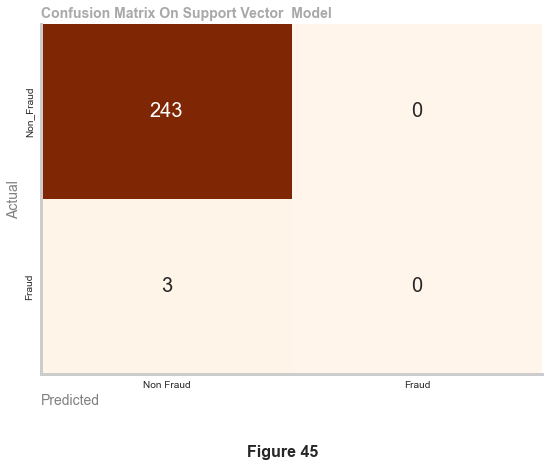

In [203]:
# predict on the test data
y_pred = cls_svm.predict(X_test30)

# compute the confusion marix
confusion_matrix(y_test30, y_pred)

# calulate accurracy
accuracy=accuracy_score(y_test30,y_pred)
print(f'Accuracy : {accuracy:.2f}')

# print classification model
print ('Classification Report on Support Vector Machine Model :')
print(classification_report(y_test30, y_pred))

# calulate precision 7 recall scores
precision= precision_score(y_test30,y_pred)
recall=recall_score(y_test30,y_pred)

print(f'Precision on Suport Vector including Kmeans : {precision: .2f}')
print(f'Recall on Support Vector : {recall:.2f}')


# plot the confusion matrix
cm = confusion_matrix(y_test30, y_pred)
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="d", cbar=False,
            xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non_Fraud', 'Fraud'],annot_kws={'size':20})

# set the plot properties
plt.title('Confusion Matrix On Support Vector  Model  ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 45', ha='center', va='center',fontsize=16, fontweight='bold')
plt.show()

In [204]:
# Train the isolation forest model
if_model = IsolationForest(n_estimators=100, random_state=0).fit(X_train30)
# Predict the anomalies
if_prediction = if_model.predict(X_test30)
# Change the anomalies' values to make it consistent with the true values
if_prediction = [1 if i==-1 else 0 for i in if_prediction]
# Check the model performance
print(classification_report(y_test30, if_prediction))

# Calculate Precision & Recall
precision=precision_score(y_test30, if_prediction)
recall= recall_score(y_test30, if_prediction)

print(f'Precision: {precision:.2f}')
print(f'recall:{recall:.2f}')

# Amy @GrabNGoInfo,2022.Isolation Forest For Anomaly Detection..Available at: https://medium.com/grabngoinfo/isolation-forest-for-anomaly-detection-cd7871ae99b4 [Accesed] 19-11-2023]

              precision    recall  f1-score   support

           0       1.00      0.52      0.69       243
           1       0.03      1.00      0.05         3

    accuracy                           0.53       246
   macro avg       0.51      0.76      0.37       246
weighted avg       0.99      0.53      0.68       246

Precision: 0.03
recall:1.00


In [205]:
# Get pipeline parameters
best_params = if_model.get_params()

# Print pipeline parameters
print(best_params)

{'bootstrap': False, 'contamination': 'auto', 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 0, 'verbose': 0, 'warm_start': False}


Accuracy : 0.53
Classification Report on Isolation Forest Machine Model :
              precision    recall  f1-score   support

           0       1.00      0.52      0.69       243
           1       0.03      1.00      0.05         3

    accuracy                           0.53       246
   macro avg       0.51      0.76      0.37       246
weighted avg       0.99      0.53      0.68       246

Precision on Isolation Forest :  0.03
Recall Isolation Forest : 1.00


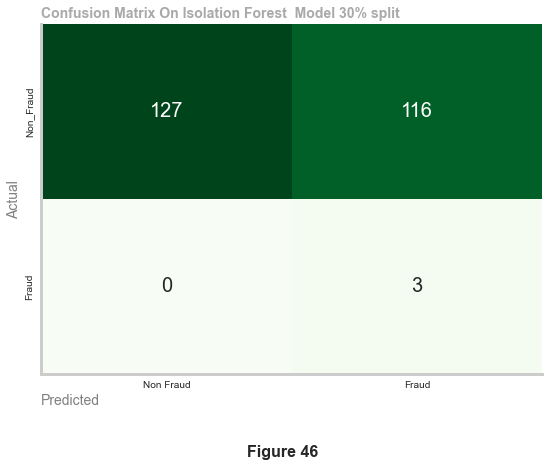

In [206]:
# predict on the test data
y_pred = if_model.predict(X_test30)

# Convert predictions to match the labels (0 for non-fraud and 1 for fraud)
y_pred = [1 if i == -1 else 0 for i in y_pred]

# compute the confusion marix
confusion_matrix(y_test30, y_pred)

# calulate accurracy
accuracy=accuracy_score(y_test30,y_pred)
print(f'Accuracy : {accuracy:.2f}')

# print classification model
print ('Classification Report on Isolation Forest Machine Model :')
print(classification_report(y_test30, y_pred))

# calulate precision 7 recall scores
precision= precision_score(y_test30,y_pred)
recall=recall_score(y_test30,y_pred)

print(f'Precision on Isolation Forest : {precision: .2f}')
print(f'Recall Isolation Forest : {recall:.2f}')


# plot the confusion matrix
cm = confusion_matrix(y_test30, y_pred)
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d", cbar=False,
            xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non_Fraud', 'Fraud'],annot_kws={'size':20})

# set the plot properties
plt.title('Confusion Matrix On Isolation Forest  Model 30% split ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 46', ha='center', va='center',fontsize=16, fontweight='bold')
plt.show()

In [207]:
# Train the isolation forest model
if_model = IsolationForest(n_estimators=100, random_state=0).fit(X_train20)
# Predict the anomalies
if_prediction = if_model.predict(X_test20)
# Change the anomalies' values to make it consistent with the true values
if_prediction = [1 if i==-1 else 0 for i in if_prediction]
# Check the model performance
print(classification_report(y_test20, if_prediction))

# Calculate Precision & Recall
precision=precision_score(y_test20, if_prediction)
recall= recall_score(y_test20, if_prediction)

print(f'Precision: {precision:.2f}')
print(f'recall:{recall:.2f}')


              precision    recall  f1-score   support

           0       0.99      0.50      0.66       162
           1       0.01      0.50      0.02         2

    accuracy                           0.50       164
   macro avg       0.50      0.50      0.34       164
weighted avg       0.98      0.50      0.66       164

Precision: 0.01
recall:0.50


Accuracy : 0.50
Classification Report on Isolation Forest Machine Model :
              precision    recall  f1-score   support

           0       0.99      0.50      0.66       162
           1       0.01      0.50      0.02         2

    accuracy                           0.50       164
   macro avg       0.50      0.50      0.34       164
weighted avg       0.98      0.50      0.66       164

Precision on Isolation Forest :  0.01
Recall Isolation Forest : 0.50


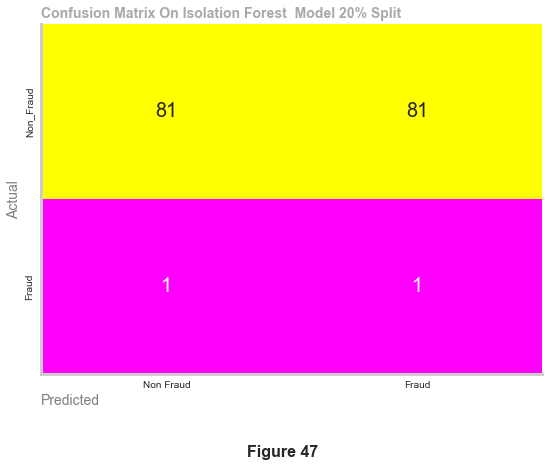

In [208]:
# predict on the test data
y_pred = if_model.predict(X_test20)

# Convert predictions to match the labels (0 for non-fraud and 1 for fraud)
y_pred = [1 if i == -1 else 0 for i in y_pred]

# compute the confusion marix
confusion_matrix(y_test20, y_pred)

# calulate accurracy
accuracy=accuracy_score(y_test20,y_pred)
print(f'Accuracy : {accuracy:.2f}')

# print classification model
print ('Classification Report on Isolation Forest Machine Model :')
print(classification_report(y_test20, y_pred))

# calulate precision 7 recall scores
precision= precision_score(y_test20,y_pred)
recall=recall_score(y_test20,y_pred)

print(f'Precision on Isolation Forest : {precision: .2f}')
print(f'Recall Isolation Forest : {recall:.2f}')


# plot the confusion matrix
cm = confusion_matrix(y_test20, y_pred)
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="spring", fmt="d", cbar=False,
            xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non_Fraud', 'Fraud'],annot_kws={'size':20})

# set the plot properties
plt.title('Confusion Matrix On Isolation Forest  Model 20% Split ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 47', ha='center', va='center',fontsize=16, fontweight='bold')
plt.show()

In [209]:
# Train the isolation forest model
if_model = IsolationForest(n_estimators=100, random_state=0).fit(X_train40)
# Predict the anomalies
if_prediction = if_model.predict(X_test40)
# Change the anomalies' values to make it consistent with the true values
if_prediction = [1 if i==-1 else 0 for i in if_prediction]
# Check the model performance
print(classification_report(y_test40, if_prediction))

# Calculate Precision & Recall
precision=precision_score(y_test40, if_prediction)
recall= recall_score(y_test40, if_prediction)

print(f'Precision: {precision:.2f}')
print(f'recall:{recall:.2f}')

              precision    recall  f1-score   support

           0       1.00      0.53      0.69       324
           1       0.03      1.00      0.05         4

    accuracy                           0.53       328
   macro avg       0.51      0.76      0.37       328
weighted avg       0.99      0.53      0.68       328

Precision: 0.03
recall:1.00


Accuracy : 0.53
Classification Report on Isolation Forest Machine Model :
              precision    recall  f1-score   support

           0       1.00      0.53      0.69       324
           1       0.03      1.00      0.05         4

    accuracy                           0.53       328
   macro avg       0.51      0.76      0.37       328
weighted avg       0.99      0.53      0.68       328

Precision on Isolation Forest :  0.03
Recall Isolation Forest : 1.00


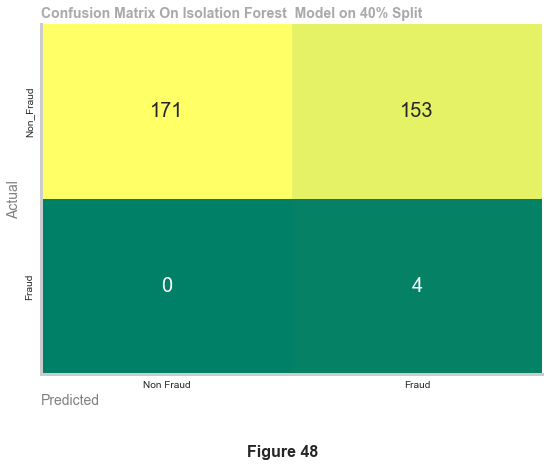

In [210]:
# predict on the test data
y_pred = if_model.predict(X_test40)

# Convert predictions to match the labels (0 for non-fraud and 1 for fraud)
y_pred = [1 if i == -1 else 0 for i in y_pred]

# compute the confusion marix
confusion_matrix(y_test40, y_pred)

# calulate accurracy
accuracy=accuracy_score(y_test40,y_pred)
print(f'Accuracy : {accuracy:.2f}')

# print classification model
print ('Classification Report on Isolation Forest Machine Model :')
print(classification_report(y_test40, y_pred))

# calulate precision 7 recall scores
precision= precision_score(y_test40,y_pred)
recall=recall_score(y_test40,y_pred)

print(f'Precision on Isolation Forest : {precision: .2f}')
print(f'Recall Isolation Forest : {recall:.2f}')


# plot the confusion matrix
cm = confusion_matrix(y_test40, y_pred)
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="summer", fmt="d", cbar=False,
            xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non_Fraud', 'Fraud'],annot_kws={'size':20})

# set the plot properties
plt.title('Confusion Matrix On Isolation Forest  Model on 40% Split ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 48', ha='center', va='center',fontsize=16, fontweight='bold')
plt.show()

In [211]:
# Create list for best params
best_params= if_model.get_params()
print('Parameters currently in use:\n')
pprint(best_params)

Parameters currently in use:

{'bootstrap': False,
 'contamination': 'auto',
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': None,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [212]:
# Define the parameter grid
random_grid = {
    'n_estimators': [100, 200, 300],
    'max_samples': [100, 200, 300],
    'contamination': [0.1, 0.2, 0.3],
    'max_features': ['auto', 'sqrt']
}

In [213]:
#Will Koehrsen,2018.Hyperparameter Tuning the Random Forest in Python..Available at: https://medium.com/towards-data-science/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 [Accesed] 06-12-2023].
# define the scoring function
scoring_func=make_scorer(recall_score)
# define parameters
random_grid= {
    'n_estimators' : [100,200,300],
    'max_samples':[100,200,300],
    'contamination':[0.1,0.2,0.3],
    'max_features' : [4]
}

# Search cross validation

grid_search= GridSearchCV(estimator=if_model,param_grid=random_grid,
                        cv=3,verbose=2, n_jobs=-1,
                        scoring=scoring_func)

grid_search.fit(X_train40, y_train40)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=IsolationForest(random_state=0), n_jobs=-1,
             param_grid={'contamination': [0.1, 0.2, 0.3], 'max_features': [4],
                         'max_samples': [100, 200, 300],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(recall_score), verbose=2)

In [214]:
# Visualise best params after gridsearch
best_params = grid_search.best_params_
best_params

{'contamination': 0.1,
 'max_features': 4,
 'max_samples': 100,
 'n_estimators': 100}

In [215]:
# Train the isolation forest model
if_model = IsolationForest(n_estimators=100,max_samples=100,
                           max_features= 4, contamination='auto',random_state=0).fit(X_train40)
# Predict the anomalies
if_prediction = if_model.predict(X_test40)
# Change the anomalies' values to make it consistent with the true values
if_prediction = [1 if i==-1 else 0 for i in if_prediction]
# Check the model performance
print(classification_report(y_test40, if_prediction))

# Calculate Precision & Recall
precision=precision_score(y_test40, if_prediction)
recall= recall_score(y_test40, if_prediction)

print(f'Precision: {precision:.2f}')
print(f'recall:{recall:.2f}')

              precision    recall  f1-score   support

           0       1.00      0.53      0.69       324
           1       0.03      1.00      0.05         4

    accuracy                           0.53       328
   macro avg       0.51      0.76      0.37       328
weighted avg       0.99      0.53      0.68       328

Precision: 0.03
recall:1.00


Accuracy : 0.53
Classification Report on Isolation Forest Machine Model after gridsearch & Tuning :
              precision    recall  f1-score   support

           0       1.00      0.53      0.69       324
           1       0.03      1.00      0.05         4

    accuracy                           0.53       328
   macro avg       0.51      0.76      0.37       328
weighted avg       0.99      0.53      0.68       328

Precision on Isolation Forest :  0.03
Recall Isolation Forest : 1.00


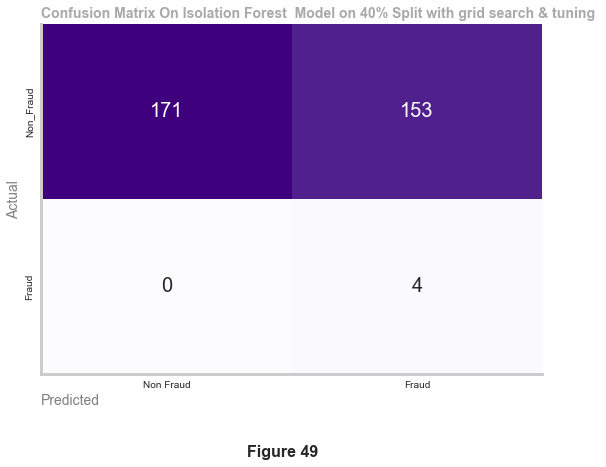

In [216]:
# predict on the test data
y_pred = if_model.predict(X_test40)

# Convert predictions to match the labels (0 for non-fraud and 1 for fraud)
y_pred = [1 if i == -1 else 0 for i in y_pred]

# compute the confusion marix
confusion_matrix(y_test40, y_pred)

# calulate accurracy
accuracy=accuracy_score(y_test40,y_pred)
print(f'Accuracy : {accuracy:.2f}')

# print classification model
print ('Classification Report on Isolation Forest Machine Model after gridsearch & Tuning :')
print(classification_report(y_test40, y_pred))

# calulate precision 7 recall scores
precision= precision_score(y_test40,y_pred)
recall=recall_score(y_test40,y_pred)

print(f'Precision on Isolation Forest : {precision: .2f}')
print(f'Recall Isolation Forest : {recall:.2f}')


# plot the confusion matrix
cm = confusion_matrix(y_test40, y_pred)
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Purples", fmt="d", cbar=False,
            xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non_Fraud', 'Fraud'],annot_kws={'size':20})

# set the plot properties
plt.title('Confusion Matrix On Isolation Forest  Model on 40% Split with grid search & tuning ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
# Adding a figure label
plt.figtext(0.5,-0.111,'Figure 49', ha='center', va='center',fontsize=16, fontweight='bold')
plt.show()

# Final Pipeline

In [217]:
# Define your custom colors using hexadecimal codes
colors_hex = ['#50AB6A', '#7950AB']  # Example colors, replace with your own

# Convert hexadecimal colors to RGBA format
colors_rgba = [mcolors.hex2color(color) for color in colors_hex]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list('CustomColors', colors_rgba, N=len(colors_hex))

In [218]:
# Separating features in to x & y
X_final = df_combined.drop(columns=["Fraud","Transaction"])
y_final = df_combined.Fraud

# Selecting features from the numerical columns
num_cols = X_final.select_dtypes(exclude=['object']).columns.tolist()
num_cols

# Selecting features from the categorical columns
cat_cols = X_final.select_dtypes(include=['object']).columns.tolist()
cat_cols

# Divide data into train & Test sp;itd
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, 
                                                   test_size=0.40,random_state=42)

# Define preprocessing for numerical columns
numeric_preprocessor = Pipeline(
    steps=[
        ('knn_imputer', KNNImputer(n_neighbors=3)),
        ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_preprocessor = Pipeline(
    steps=[(('imputer', SimpleImputer(missing_values=np.nan, strategy='constant'))),
           ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Define processor to preprocess numerical & categorical data
preprocessor = ColumnTransformer(
    [('categorical', categorical_preprocessor, cat_cols),
        ('numerical', numeric_preprocessor, num_cols)])

# Construct pipline with preprocessing, dimensionality reduction, and model
pipe_final = make_pipeline(preprocessor, PCA(n_components=0.90), IsolationForest())

# View the pipeline
pipe_final

# Fit the model
clf = pipe_final.fit(X_train_final,y_train_final)


# Fit the model
clf = pipe_final.fit(X_train_final,y_train_final)

# Train the isolation forest model
if_model = IsolationForest(n_estimators=600,max_samples='auto',
                           max_features= 1, contamination='auto',random_state=0).fit(X_train40)
# Predict the anomalies
if_prediction = if_model.predict(X_test40)
# Change the anomalies' values to make it consistent with the true values
if_prediction = [1 if i==-1 else 0 for i in if_prediction]
# Check the model performance
print(classification_report(y_test40, if_prediction))

# Calculate Precision & Recall
precision=precision_score(y_test40, if_prediction)
recall= recall_score(y_test40, if_prediction)

print(f'Precision: {precision:.2f}')
print(f'recall:{recall:.2f}')



              precision    recall  f1-score   support

           0       1.00      0.53      0.69       324
           1       0.03      1.00      0.05         4

    accuracy                           0.53       328
   macro avg       0.51      0.76      0.37       328
weighted avg       0.99      0.53      0.68       328

Precision: 0.03
recall:1.00


In [219]:
import matplotlib.colors as mcolors

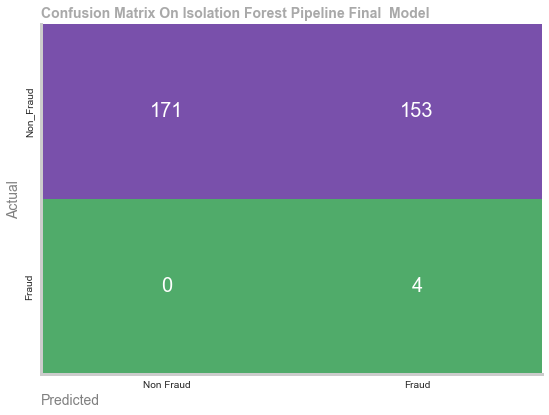

In [220]:
#Unknown (unknown). Specifying colors. https://matplotlib.org/stable/users/explain/colors/colors.html. [Accessed 2 May, 2024]
# Set style of plot
# Define colors using hexadecimal codes

colors_hex= ['#50AB6A','#7950AB']

# convert hexadecimal colors to RGBA format
colors_rbga=[mcolors.hex2color(color) for color in colors_hex]

# Create a custome color Map
custom_map=mcolors.LinearSegmentedColormap.from_list('CustomColors', colors_rbga, N=len(colors_hex))



# plot the confusion matrix
cm = confusion_matrix(y_test40, y_pred)
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=custom_map, fmt="d", cbar=False,
            xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non_Fraud', 'Fraud'],annot_kws={'size':20})

# set the plot properties
plt.title('Confusion Matrix On Isolation Forest Pipeline Final  Model  ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
# Adding a figure label
# plt.figtext(0.5,-0.111,'Figure 50', ha='center', va='center',fontsize=16, fontweight='bold')
plt.show()

#  Pickle Model

In [221]:
 # Save the best  model to be used later for new data using pickle
filename = 'bestModel.sav'
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))

# References



Allison Stafford,2020.Using ColumnTransformer to combine data processing steps..Available at: https://medium.com/towards-data-science/using-columntransformer-to-combine-data-processing-steps-af383f7d5260 [Accesed] 05-12-2023].

 Brandon Wohlend,2023.Converting Categorical Data into Numerical Form: A Practical Guide for Data Science..Available at: https://medium.com/@brandon93.w/converting-categorical-data-into-numerical-form-a-practical-guide-for-data-science-99fdf42d0e10 [Accesed] 05-12-2023].
 
 Hamza b,2018.Building an Employee Churn Model in Python to Develop a Strategic Retention Plan..Available at: https://medium.com/towards-data-science/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d [Accesed] 14-12-2023] 
 
 Geron, A. (2019) Hands-on machine learning with scikit-learn, keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. 2nd ed. Sebastopol, CA: O’Reilly Media.
 
 Mahesh Tiwari,2023.Complete Exploratory Data Analysis (EDA)of Loan Data and Visualization: Understanding Loan Characteristics and Default Patterns..Available at: https://medium.com/nerd-for-tech/complete-exploratory-data-analysis-eda-of-loan-data-and-visualization-understanding-loan-120651cfefc8 [Accesed] 03-12-2023].
 
  Nussbaumer Knaflic, C. (2015). Storytelling with data (C. N. Knaflic, Ed.). John Wiley & Sons.
  
   Tracyrenee,2021.How to use skearn’s DummyRegressor method..Available at: https://medium.com/geekculture/how-to-use-skearns-dummyregressor-method-f08098212c54 [Accesed] 06-12-2023].


unknown,unknown.Simple 1D Kernel Density Estimation..Available at: https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html [Accesed] 7-11-2023]

#Unknown (unknown). Specifying colors. https://matplotlib.org/stable/users/explain/colors/colors.html. [Accessed 2 May, 2024]

Unknown (unknown). Create beautiful palettes with Adobe Color. https://color.adobe.com/. [Accessed 2 May, 2024]

 #Pedregosa et al (JMLR 12, pp. 2825-2830, 201). Scikit-learn: Machine Learning in Python,. https://scikit-learn.org/stable/about.html#citing-scikit-learn. [Accessed 23th April, 2024]



Will Koehrsen,2018.Hyperparameter Tuning the Random Forest in Python..Available at: https://medium.com/towards-data-science/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 [Accesed] 06-12-2023].

 Xiao,2022.A Practical Guide To Exploratory Data Analysis..Available at: https://medium.com/mlearning-ai/a-practical-guide-to-exploratory-data-analysis-fabbac2bcad [Accesed] 03-11-2023].
 




 
 
 
 
 
 